# Imports

In [197]:
import matplotlib.pyplot as plt # Enhables plotting the graphs

import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # Chi-squared test
from tabulate import tabulate # library to create formatted tables
from scipy.stats import ttest_ind # T-test
from IPython.display import Image, display # Display images in jupyter notebook

import numpy as np # Package for array computing
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression # Linear and and logistic regression models
from sklearn.metrics import mean_squared_error, r2_score # Metrics for regression models
import statsmodels.api as sm # Statistical models library
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tunning using cross-validation
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classifier
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score # Matrix for classification models
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Feature scaling and one-hot encoding
from sklearn.compose import ColumnTransformer # Apply different preprocessing to different columns
from sklearn.pipeline import Pipeline # Pipeline for chaining multiple steps together

np.random.seed(0) # Seed the random number generator for reproducibility

# **1- Introduction**

##Objective:
With this project our goal is to optimize a machine learning model that can predict re-admission within 30 days after a diabetic encounter discharge.


## Dataset description:

The dataset analyzed in this report originates from the UCI Machine Learning Repository, specifically the "Diabetes 130-US hospitals for years 1999-2008 Data Set." It contains records of diabetic patient encounters from 130 hospitals across the United States, spanning from 1999 to 2008. This dataset includes patient demographics, medical records, hospital information, and clinical measurements.
The patient demographics section provides information about patients such as age, gender, and race. The medical records section contains detailed medical information, including primary and secondary diagnoses, procedures performed, and medication administered during hospital encounters. Hospital information data covers details related to hospital admissions, such as admission type, discharge status, length of stay, and readmission indicators. Finally, the clinical measurements section includes results from laboratory tests and other vital sign measurements.

The database consisted of 81176 people and 27 variables were taken into acount with the following types:
*   9 Numerical
*   18 categorical

**‘encounter_id’** – numerical – Unique identifier of an encounter.

**‘patient_nbr’** - numerical - Unique identifier of a patient.

**‘race’** – categorical – Values: Caucasian, Asian, African American, Hispanic, and other.

**‘gender’** – categorical – Values: male, female, and unknown/invalid.

**‘age’** – categorical – Grouped in 10-year intervals: [0, 10), [10, 20), ..., [90, 100).

**‘admission_type_id’** – categorical – Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available.

**‘discharge_disposition_id’** – categorical – Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available.

**‘admission_source_id’** – categorical – Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital.

**‘Time_in_hospital’** – numerical – Integer number of days between admission and discharge.

**‘Medical_specialty’** – categorical – String corresponding to 73 distinct values, for example, Cardiology, Family/GeneralPractice, ...

**‘Num_lab_procedures’** – numerical – Number of lab tests performed during the encounter.

**‘num_procedures’** – numerical – Number of procedures (other than lab tests) performed during the encounter.

**‘num_medications’** – numerical – Number of distinct generic names administered during the encounter.

**‘number_outpatient’** – numerical – Number of outpatient visits of the patient in the year preceding the encounter.

**‘number_emergency’** – numerical – Number of emergency visits of the patient in the year preceding the encounter.

**‘number_inpatient’** – numerical – Number of inpatient visits of the patient in the year preceding the encounter.

**‘diagnosis’** – categorical – Primary, secondary and additional secondary codes (coded as CCS)
**‘number_diagnoses’** – numerical – Number of diagnoses entered to the system.

**‘A1Cresult’** – categorical – Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**‘Insulin’** – categorical – Indicates whether insulin was prescribed “yes” or not “no”.

**‘other_meds’** – categorical – Indicates whether any other drugs were prescribed “yes” or not “no”.

**‘insulin_change’** – categorical – Indicates whether insulin had a change in dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change.

**‘other_meds_change’** – categorical – Indicates whether other drugs had a change in dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change.

**‘diabetesMed’** – categorical – Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”.

# **2 - Data Exploration and Preprocessing**


In [198]:
from IPython.core.interactiveshell import InteractiveShell # Import the InteractiveShell class from IPython.core.interactiveshell
InteractiveShell.ast_node_interactivity = "all" # Set the interactive shell to display all results of a cell, not just the last one
pd.set_option('display.max_columns', None) # Set the pandas option to display all columns in a DataFrame

In [199]:
dataset_source = 'https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Final%20Project/data/data.csv' # Import of dataset from the source
df = pd.read_csv(dataset_source) # Load the dataset into a DataFrame
df.head(3) # Display the first 3 (three) rows of the dataset

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change,Readmitted
0,2278392,50941692,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,50.0,NaN,NaN,1,Unknown,No,No,No,No,No,0
1,149190,24691500,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,0,18,0,0,0,55.0,49.0,51.0,9,Unknown,Yes,Yes,Yes,No,No,0
2,64410,55584504,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,5,13,2,0,1,186.0,49.0,196.0,6,Unknown,Yes,No,No,Yes,No,0


In [200]:
df.shape # Display the shape of the dataset, rows and columns

(81176, 27)

In [201]:
df.dtypes # Check the type of variables we have

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
A1Cresult                    object
diabetesMed                  object
insulin_taken                object
insulin_change               object
other_meds                   object
other_meds_change            object
Readmitted                    int64
dtype: object

In [202]:
df.isnull().sum() # Check for missing values

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        25
diag_2                       278
diag_3                      1144
number_diagnoses               0
A1Cresult                      0
diabetesMed                    0
insulin_taken                  0
insulin_change                 0
other_meds                     0
other_meds_change              0
Readmitted                     0
dtype: int64

In [203]:
final_db = df.drop(columns=['encounter_id','patient_nbr']) # Define a new variable called final_db in which we drop the variables that were not relevant

##Creating a new database

- Basically, both the **'patient_nbr'** and the **'encounter_id'** are unique identifiers. This means that they do not hold any value or relationship with the target variable
- For that reason, we created a new database called **'final_db'** without taking into account these two variables

In [204]:
final_db.fillna("Unknown", inplace = True) # Change NaN in diag_1, diag_2 and diag_3 to Unknown

In [205]:
final_db.isnull().sum() # Check for missing after the change and no missing values (NaN) seen

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
diabetesMed                 0
insulin_taken               0
insulin_change              0
other_meds                  0
other_meds_change           0
Readmitted                  0
dtype: int64

##Handling missing values

- The missing values of the variables **'diag_1', 'diag_2'** and **'diag_3'**  were handled by transforming them into Unknown variables.

**Why did we choose to do that instead of dropping the variables?**
- It was thought that the missing values may give important information. Taking this in consideration, it was decided to transform them into unkonwn, making it able to retain siginficant information.
- How is it possible to know beforehand if this missing values are not important to predict readmission within 30 days? In addition, how do we know that patients with less diagnosis will have a lower probability of being readmitted?

# 2.1 - Description Numerical Variables

In [206]:
# Change the data type of certain columns to object (categorical)
final_db['admission_type_id'] = final_db['admission_type_id'].astype('object')
final_db['discharge_disposition_id'] = final_db['discharge_disposition_id'].astype('object')
final_db['admission_source_id'] = final_db['admission_source_id'].astype('object')
final_db['diag_1'] = final_db['diag_1'].astype('str')
final_db['diag_2'] = final_db['diag_2'].astype('str')
final_db['diag_3'] = final_db['diag_3'].astype('str')
final_db.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
A1Cresult                   object
diabetesMed                 object
insulin_taken               object
insulin_change              object
other_meds                  object
other_meds_change           object
Readmitted                   int64
dtype: object

**Categorical or numerical variable?**
- When first analyzing this dataset, the type of data was explored. Initially, everything seemed fine, but it was noticed that some data were labeled as "int64" (numerical) instead of "object" (categorical).

- This likely occurred because the values were numbers, but these numbers actually represented categories. Since interpreting statistics for categorical data labeled as numerical wasn't feasible, it was decided to change this "numerical" data to categorical in order to perform basic statistics and draw meaningful conclusions.

In [207]:
final_db.describe().transpose() # Get a descriptive summary of the dataset

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,81176.0,4.398295,2.985002,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,81176.0,43.092109,19.671695,1.0,31.0,44.0,57.0,132.0
num_procedures,81176.0,1.338955,1.706029,0.0,0.0,1.0,2.0,6.0
num_medications,81176.0,16.016002,8.116236,1.0,10.0,15.0,20.0,81.0
number_outpatient,81176.0,0.367855,1.250791,0.0,0.0,0.0,0.0,40.0
number_emergency,81176.0,0.189268,0.789460,0.0,0.0,0.0,0.0,37.0
number_inpatient,81176.0,0.627833,1.243318,0.0,0.0,0.0,1.0,21.0
number_diagnoses,81176.0,7.420383,1.933612,1.0,6.0,8.0,9.0,16.0
Readmitted,81176.0,0.110180,0.313116,0.0,0.0,0.0,0.0,1.0


**GLOBAL ANALYSIS OF BASIC STATISTICS**

The variable **'num_lab_procedures'** exhibits the highest standard deviation, indicating substantial variation or dispersion around the mean. Similarly, the variable **'num_procedures'** also displays a high standard deviation.

This high variability might suggest that these variables capture significant differences that could be pertinent to predicting readmission. However, further exploration is necessary to confirm this. Conducting a correlation analysis, for instance, would help determine whether these variables are related to our target variable, **'readmitted'**.

In [208]:
print(final_db['Readmitted'].unique()) # Check unique values in the categorical variable

numerical_variables = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'] # Define the numerical variables and the categorical variable to compare
categorical_variable = 'Readmitted'  # Assuming 'Readmitted' is the column indicating readmission status

df[categorical_variable] = final_db[categorical_variable].astype(str).str.strip().str.upper() # Ensure categorical values are correct and consistent

# Perform T-tests for each numerical variable
t_test_results = []
for var in numerical_variables:
    group1 = final_db[final_db[categorical_variable] == 0][var].dropna()
    group2 = final_db[final_db[categorical_variable] == 1][var].dropna()

    if not group1.empty and not group2.empty:  # Ensure groups are not empty
        t_stat, p_value = ttest_ind(group1, group2)
        t_test_results.append({
            'Variable': var,
            'T-Statistic': t_stat,
            'P-Value': p_value
        })
    else:
        t_test_results.append({
            'Variable': var,
            'T-Statistic': float('nan'),
            'P-Value': float('nan')
        })

t_test_results_df = pd.DataFrame(t_test_results) # Convert T-test results to a DataFrame

print(t_test_results_df) # Display the T-test results

[0 1]
             Variable  T-Statistic       P-Value
0    time_in_hospital   -12.274619  1.330628e-34
1  num_lab_procedures    -5.473107  4.435179e-08
2      num_procedures     4.235850  2.279388e-05
3     num_medications   -10.399542  2.584288e-25
4   number_outpatient    -5.726898  1.026432e-08
5    number_emergency   -17.871377  2.701194e-71
6    number_inpatient   -47.404064  0.000000e+00
7    number_diagnoses   -12.987950  1.564708e-38


**T-TEST RESULTS ANALYSIS**

The t-test was performed to try to establish a comparison of the means between the numerical variables. The analysis of its results exhibits a high significance (P-value), which could be attributed to the fact that there are many data entries. Therefore, the overall T-test results will not be relevant for the dataset analysis.
Ferroni /time

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Clinical and Demographic features in the Diabetes 130-US hospitals dataset')

Text(0.5, 80.5815972222222, 'Clinical and Demographic features')

Text(120.5815972222222, 0.5, 'Clinical and Demographic features')

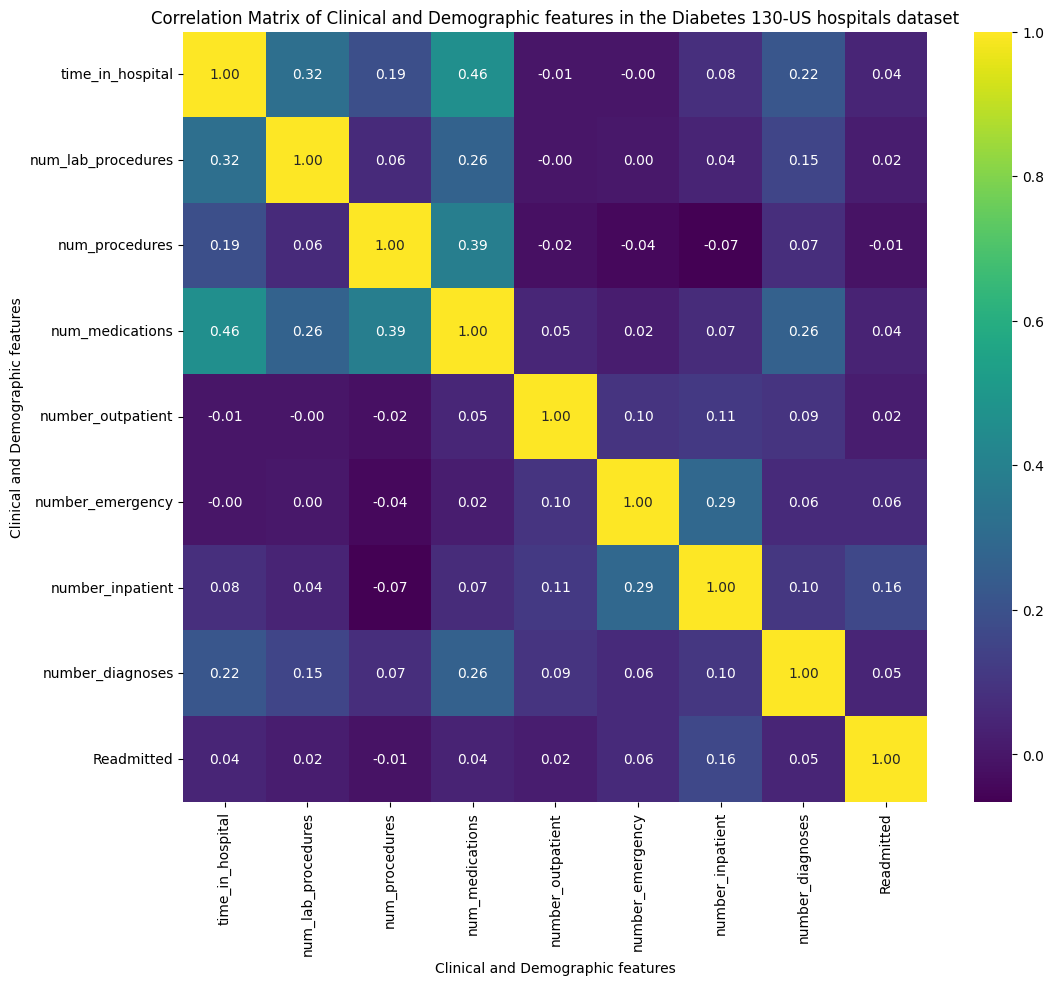

In [209]:
numeric_final_db = final_db.select_dtypes(include=['number']) # Select only the numeric columns

correlation_matrix = numeric_final_db.corr() # Calculate the correlation matrix for numerical variables

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Clinical and Demographic features in the Diabetes 130-US hospitals dataset')
plt.xlabel('Clinical and Demographic features')
plt.ylabel('Clinical and Demographic features')
plt.show()

**ANALYSIS OF CORRELATION MATRIX**
- The correlation matrix is an essential tool in data analysis and statistics because it provides a summary of the relationships between multiple variables in a dataset.
- It quantifies the strenght and direction of the relationship between pairs of variables:
  - 1 -> perfect positive linear relationship
  - -1 -> perfect negative linear relationship
  - 0 -> no linear relationship

- Within our variables, we cannot find any meaningful correlation, but there are some relationships between variables that stand out compared with others:
  1. **Positive correlation of 0.46** between variables 'num_medications' and 'time_in_hospital'
  2. **Positive correlation of 0.39** between variables 'num_medications' and 'num_procedures'
  3. **Positive correlation of 0.32** between variables 'num_lab_procedures' and 'time_in_hospital'
  4. **Positive correlation of 0.29** between variables 'number_inpatient' and 'number_emergency'

**ANALYSIS**

  1. The patients who stay longer in the hospital may be prescribed more medications.
  2. This relationship could indicate that more intensive treatments (involving more procedures) require more medications.
  3. This might reflect that more complex or severe cases (requiring more lab tests) result in longer hospital stays.
  4. Patients who have more emergency visits are likely to have more inpatient admissions, possibly indicating more severe or chronic conditions. This can be useful for predicting healthcare needs and planning.

# 2.2 - Description Categorical Variables

In [210]:
# Display value counts for categorical columns
final_db.select_dtypes('object')
cat_columns = final_db.select_dtypes('object').columns
for col in cat_columns:
    final_db[col].value_counts().to_frame()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,diag_1,diag_2,diag_3,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change
0,Caucasian,Female,[0-10),6,25,1,Pediatrics-Endocrinology,50.0,Unknown,Unknown,Unknown,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,Unknown,55.0,49.0,51.0,Unknown,Yes,Yes,Yes,No,No
2,AfricanAmerican,Female,[20-30),1,1,7,Unknown,186.0,49.0,196.0,Unknown,Yes,No,No,Yes,No
3,Caucasian,Male,[30-40),1,1,7,Unknown,228.0,50.0,99.0,Unknown,Yes,Yes,Yes,No,No
4,Caucasian,Male,[40-50),1,1,7,Unknown,42.0,17.0,49.0,Unknown,Yes,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81171,AfricanAmerican,Female,[60-70),1,1,7,Unknown,83.0,113.0,101.0,Unknown,Yes,Yes,Yes,Yes,No
81172,AfricanAmerican,Male,[70-80),1,3,7,Unknown,50.0,660.0,117.0,>8,Yes,Yes,Yes,Yes,No
81173,AfricanAmerican,Female,[80-90),1,4,5,Unknown,145.0,55.0,250.0,Unknown,Yes,Yes,No,No,No
81174,Caucasian,Female,[80-90),2,3,7,Surgery-General,237.0,59.0,238.0,Unknown,Yes,Yes,Yes,Yes,No


,count
race,
Caucasian,60802
AfricanAmerican,15261
Unknown,1803
Hispanic,1635
Other,1181
Asian,494


,count
gender,
Female,43720
Male,37453
Unknown/Invalid,3


,count
age,
[70-80),20705
[60-70),17982
[50-60),13785
[80-90),13686
[40-50),7828
[30-40),2979
[90-100),2247
[20-30),1295
[10-20),547


,count
admission_type_id,
1,43043
3,15034
2,14714
6,4264
5,3846
8,254
7,12
4,9


,count
discharge_disposition_id,
1,48144
3,11159
6,10216
18,2936
2,1711
22,1542
11,1326
5,951
25,783


,count
admission_source_id,
7,45718
1,23708
17,5454
4,2509
6,1819
2,875
5,680
3,146
20,133


,count
medical_specialty,
Unknown,39985
InternalMedicine,11762
Emergency/Trauma,5915
Family/GeneralPractice,5905
Cardiology,4224
...,...
Psychiatry-Addictive,1
Pediatrics-InfectiousDiseases,1
Neurophysiology,1


,count
diag_1,
50.0,6711
101.0,5487
108.0,5388
133.0,3382
122.0,3196
...,...
86.0,1
176.0,1
188.0,1


,count
diag_2,
49.0,6088
99.0,5684
55.0,5399
108.0,5303
101.0,5033
...,...
191.0,1
192.0,1
247.0,1


,count
diag_3,
49.0,10008
99.0,8824
55.0,4132
101.0,3788
50.0,3725
...,...
2615.0,1
41.0,1
2609.0,1


,count
A1Cresult,
Unknown,67537
>8,6588
Norm,4019
>7,3032


,count
diabetesMed,
Yes,62474
No,18702


,count
insulin_taken,
Yes,43222
No,37954


,count
insulin_change,
No,62472
Yes,18704


,count
other_meds,
No,43438
Yes,37738


,count
other_meds_change,
No,76933
Yes,4243


In [211]:
# Define the categorical variables and the target variable
categorical_variables = ['race', 'gender',	'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'diabetesMed', 'insulin_taken',	'insulin_change', 'other_meds', 'other_meds_change']
target_variable = 'Readmitted'

df[target_variable] = df[target_variable].astype(str).str.strip().str.upper() # Ensure the target variable values are consistent

results = [] # Initialize a list to store Chi-square test results

# Perform Chi-square tests for each categorical variable against the target variable
for var in categorical_variables:
    contingency_table = pd.crosstab(df[var].astype(str), df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    results.append({
        'Variable': var,
        'Chi-Square Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': dof
    })

results_df = pd.DataFrame(results) # Convert Chi-square results to a DataFrame

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)) # Display the Chi-square results as a pretty table

+--------------------------+----------------------+------------------------+--------------------+
|         Variable         | Chi-Square Statistic |        P-value         | Degrees of Freedom |
+--------------------------+----------------------+------------------------+--------------------+
|           race           |  22.91235255676955   | 0.00035084100825207417 |         5          |
|          gender          |  1.572525917335518   |  0.45554400507183357   |         2          |
|           age            |  95.51455111081818   | 1.2664486187143342e-16 |         9          |
|    admission_type_id     |  20.53294118179189   |  0.004526566744159495  |         7          |
| discharge_disposition_id |  1216.3728714264087  | 7.927728303776421e-242 |         24         |
|   admission_source_id    |  39.872487578179964  | 0.0008126651775258365  |         16         |
|    medical_specialty     |  293.8634403780039   | 6.734005480496447e-29  |         71         |
|          diag_1   

**CHI_SQUARE RESULT ANALYSIS**

The chi-square test is a statistical tool to check if two or more categorical variables are related or independent.

The analysis of most of its results exhibits a P-value lower than 0.05, which could be attributed to the fact that there are many data entries. Therefore, the overall T-test results will not be relevant for the dataset analysis. The P-value of ‘gender’ and ‘other_meds_change’ was not significant (P-value higher than 0.05) however, if it was decided not to eliminate these variables as they could be important further on. If there was more time, maybe they could have been dropped.


## Histogram Visualization

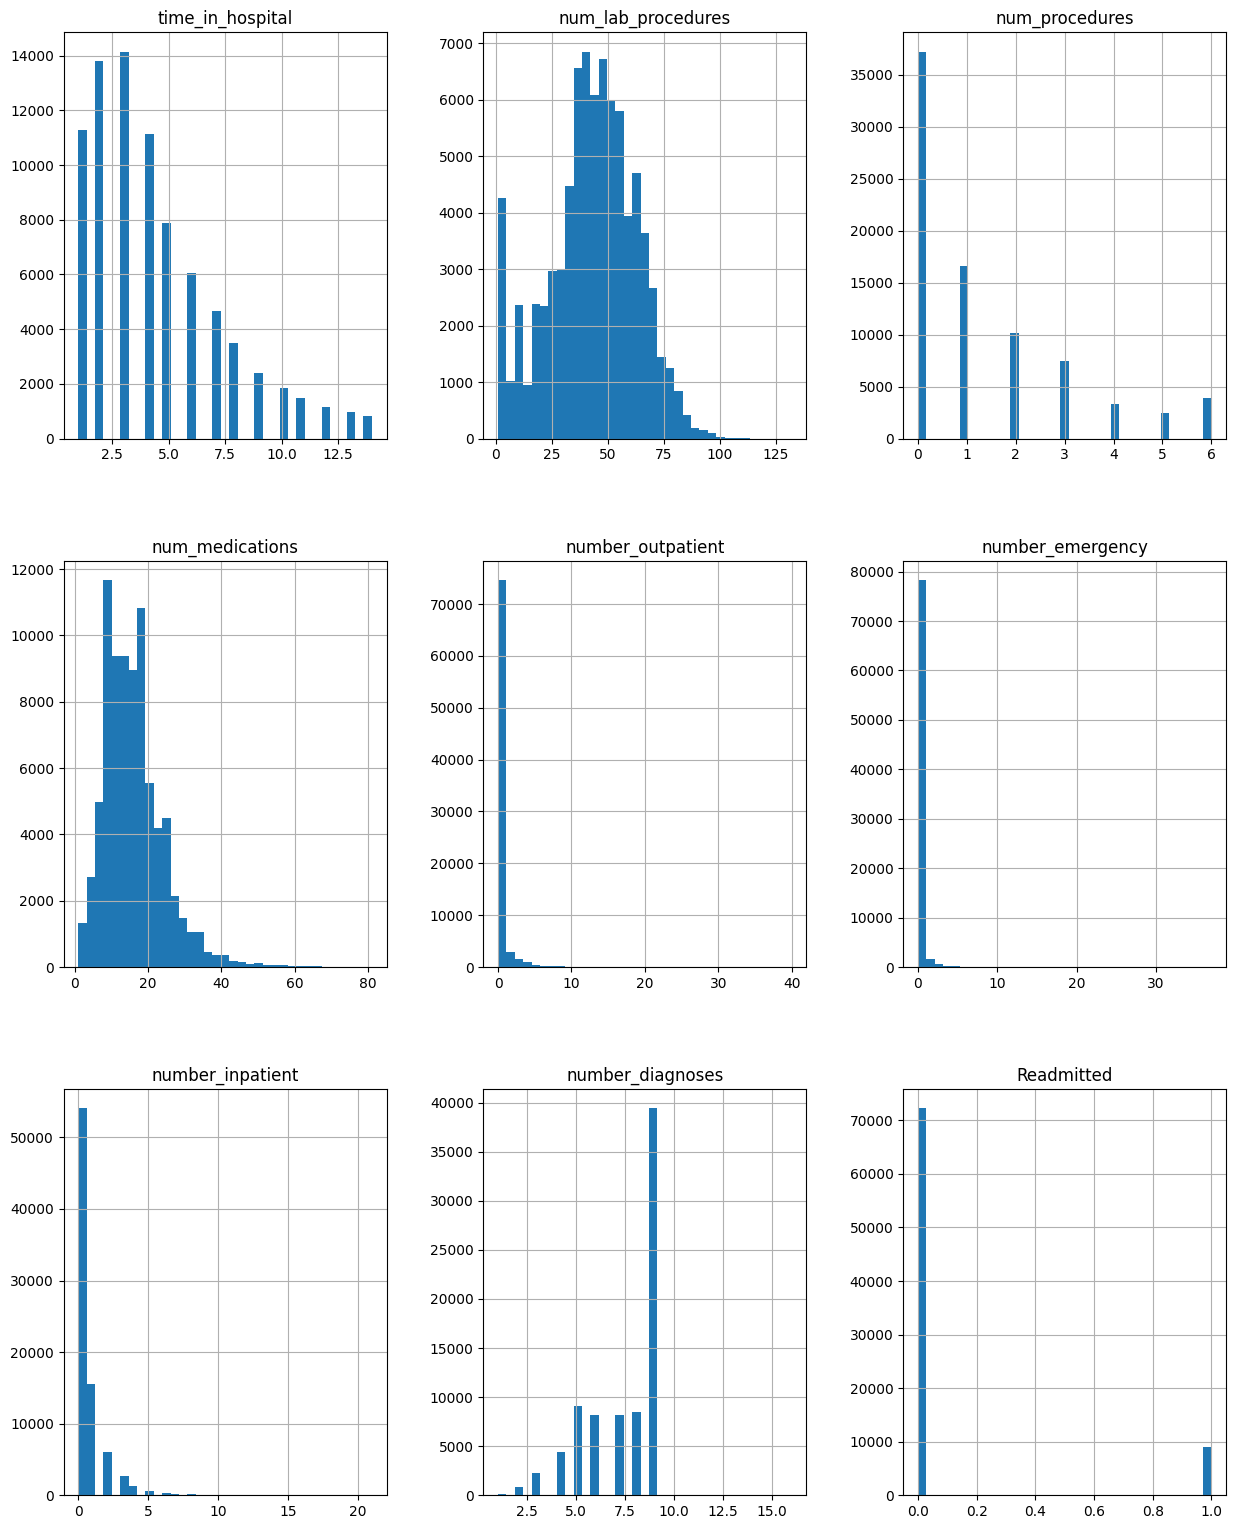

In [212]:
# Plot histograms for the final_db
hist = final_db.hist(bins=35, figsize=(15,19))
plt.show()

## Boxplot visualization

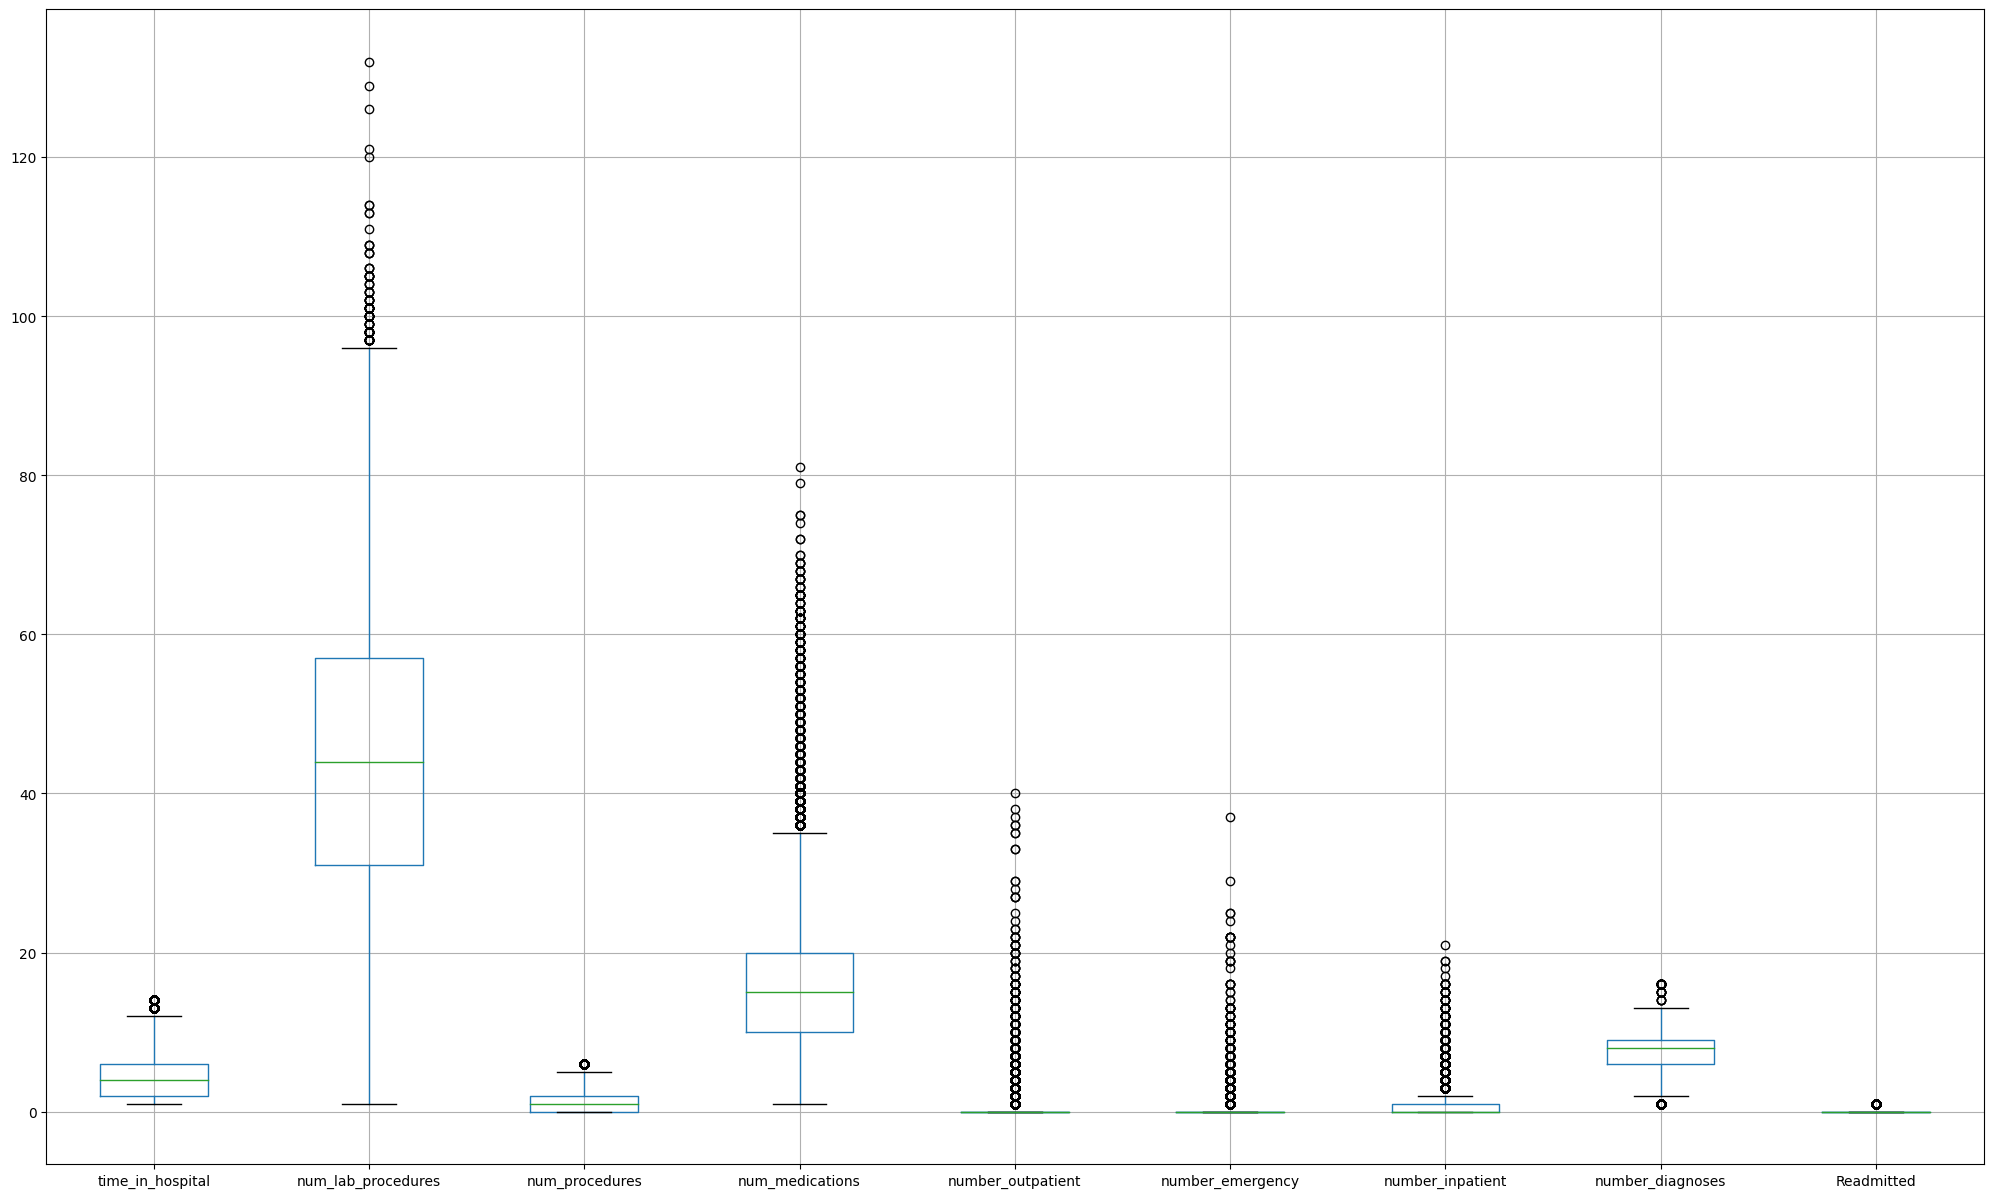

In [213]:
# Plot boxplots for the final_db
boxplot = final_db.boxplot(figsize=(25, 15))
plt.show()

**HISTOGRAMS AND BOXPLOTS RESULT ANALYSIS**

The histograms and boxplots show the distribution of the data of the numerical variables.


<Figure size 2500x1500 with 0 Axes>

<Axes: xlabel='time_in_hospital'>

Text(0.5, 1.0, 'Box Plot of Time in Hospital')

Text(0.5, 0, 'Time in Hospital (days)')

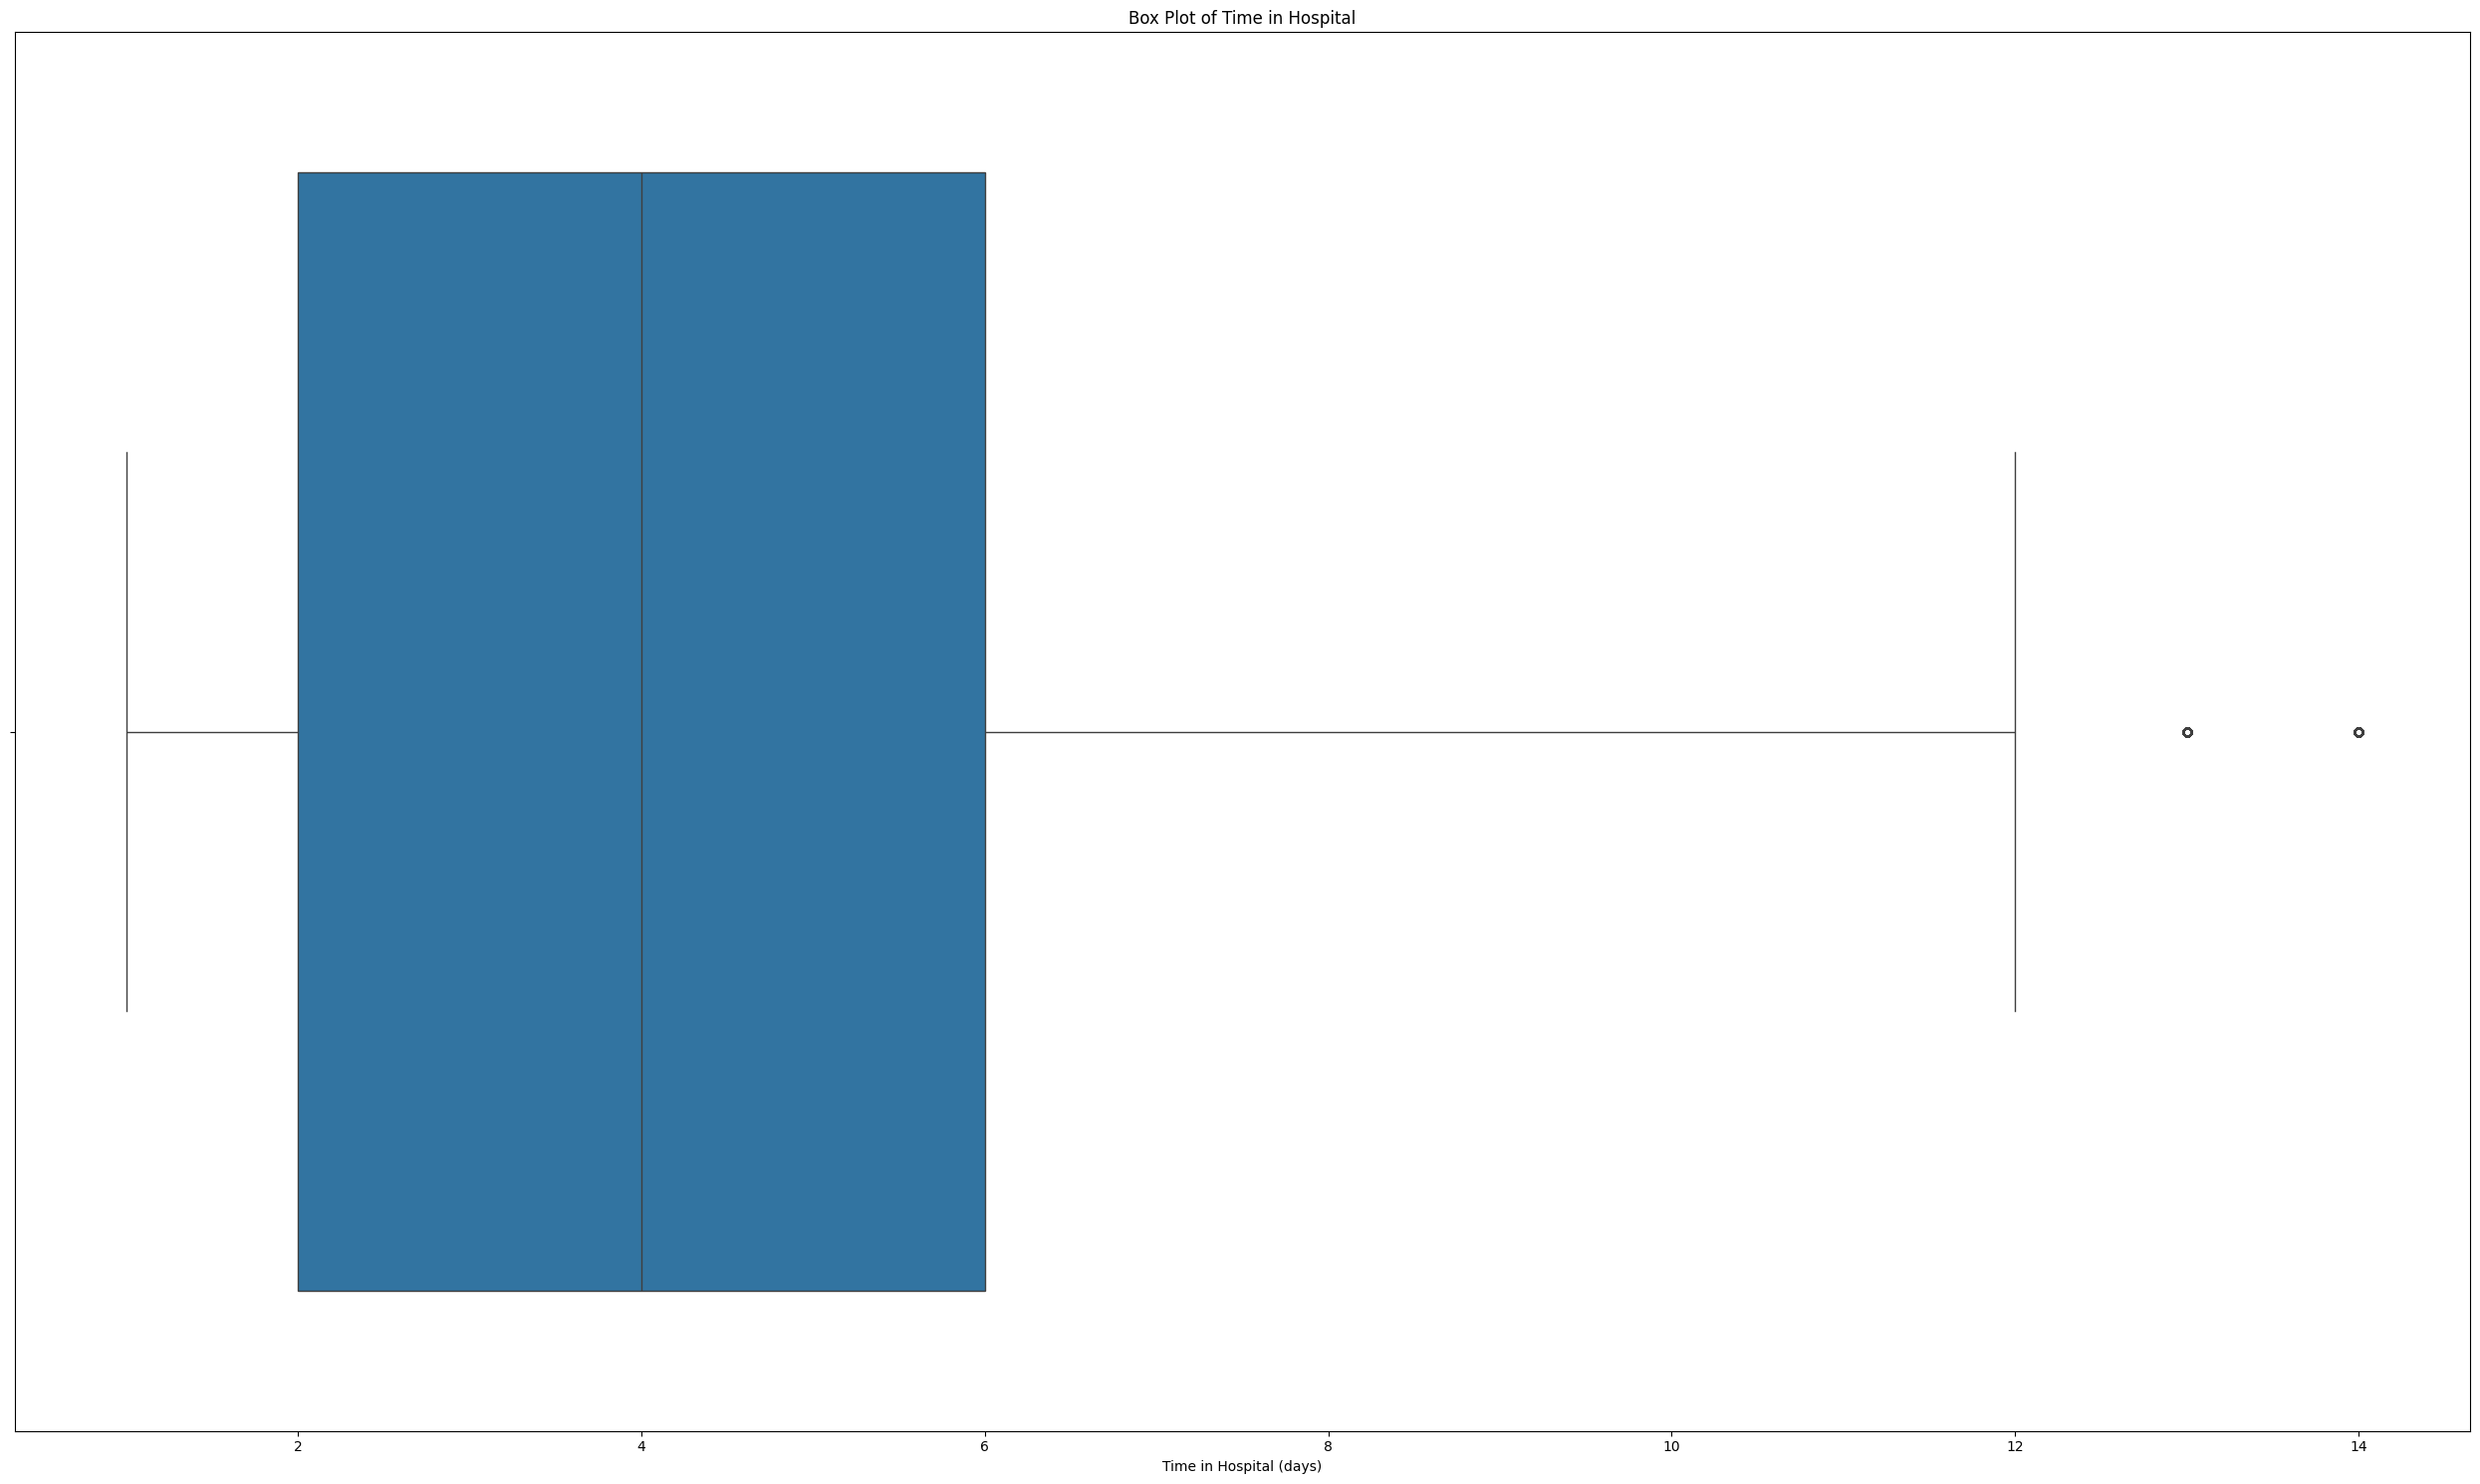

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='num_lab_procedures'>

Text(0.5, 1.0, 'Box Plot of Number of Lab Procedures')

Text(0.5, 0, 'Number of Lab Procedures')

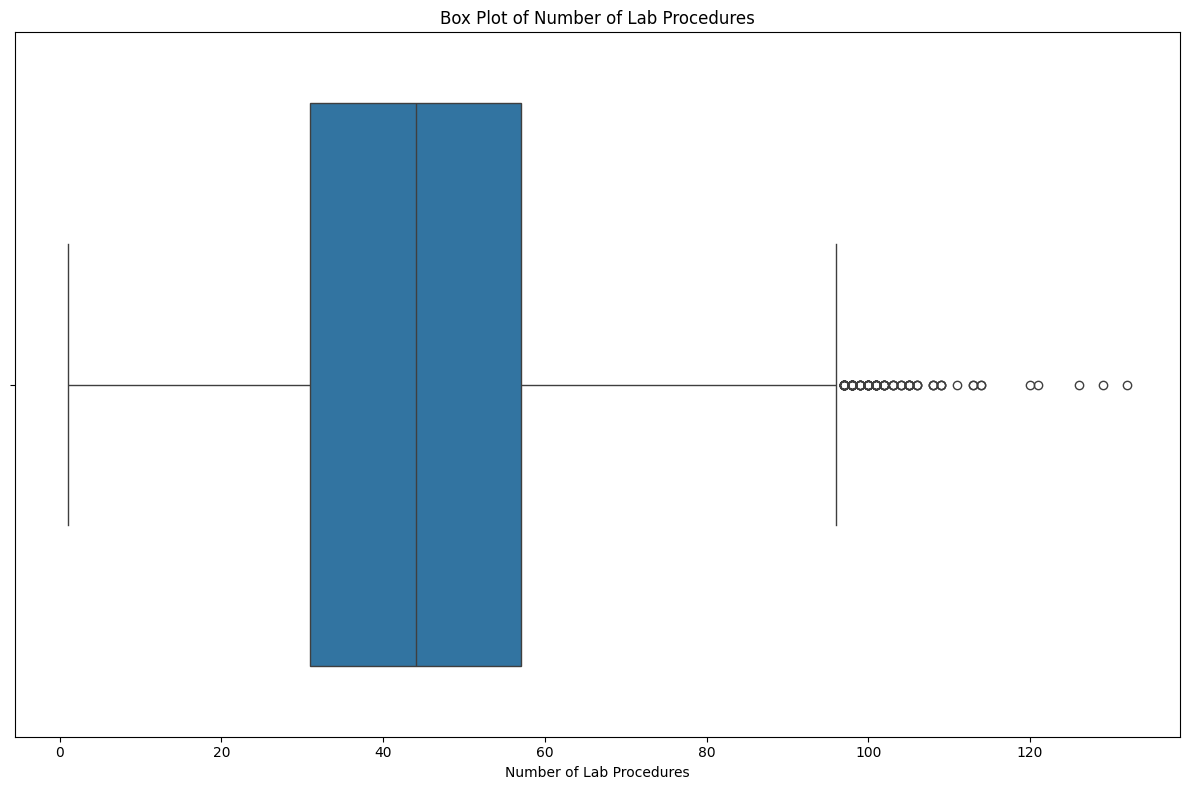

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='num_procedures'>

Text(0.5, 1.0, 'Box Plot of Number of Procedures')

Text(0.5, 0, 'Number of Procedures')

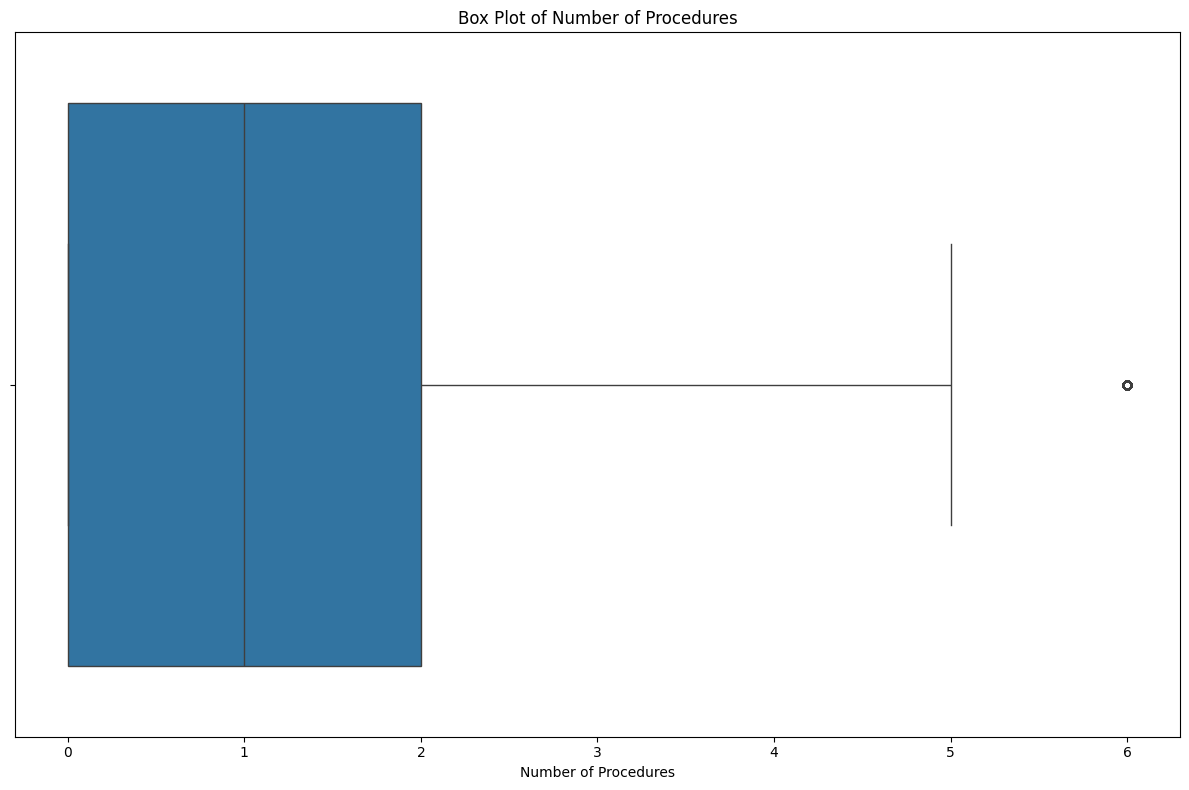

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='num_medications'>

Text(0.5, 1.0, 'Box Plot of Number of Medications')

Text(0.5, 0, 'Number of Medications')

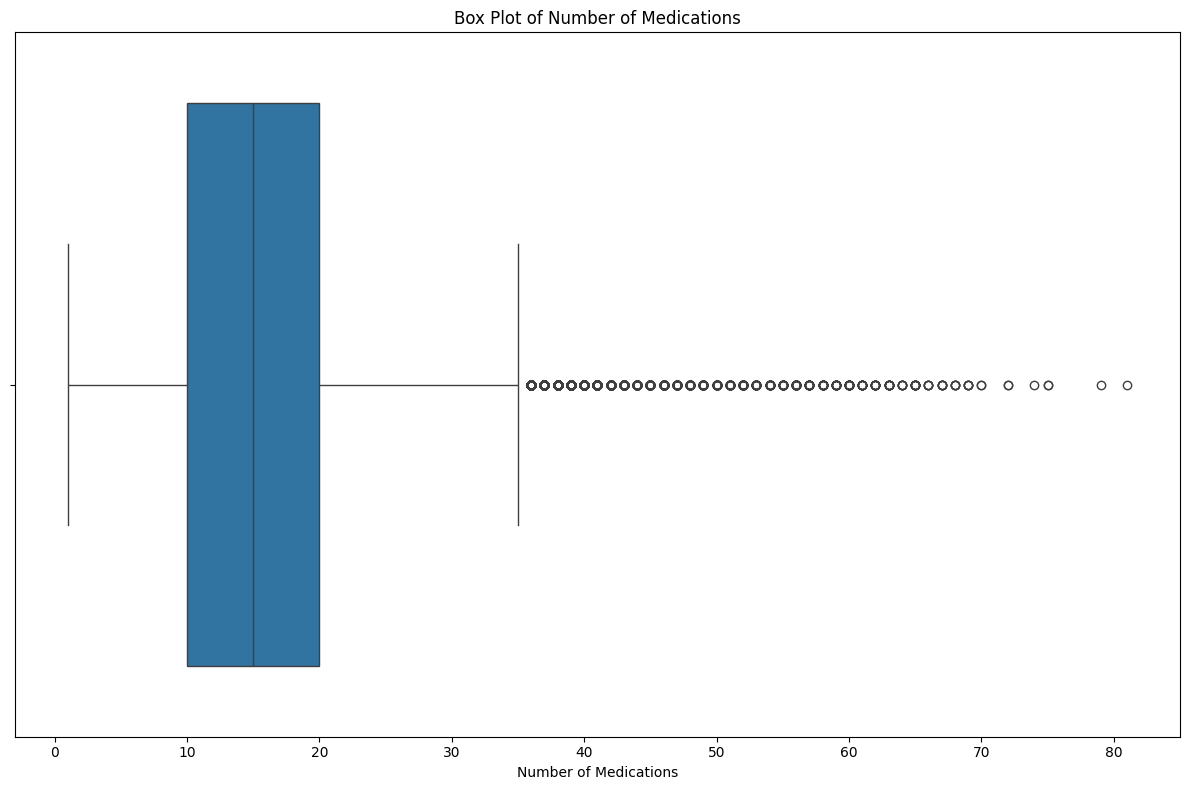

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='number_diagnoses'>

Text(0.5, 1.0, 'Box Plot of Number of Diagnoses')

Text(0.5, 0, 'Number of Diagnoses')

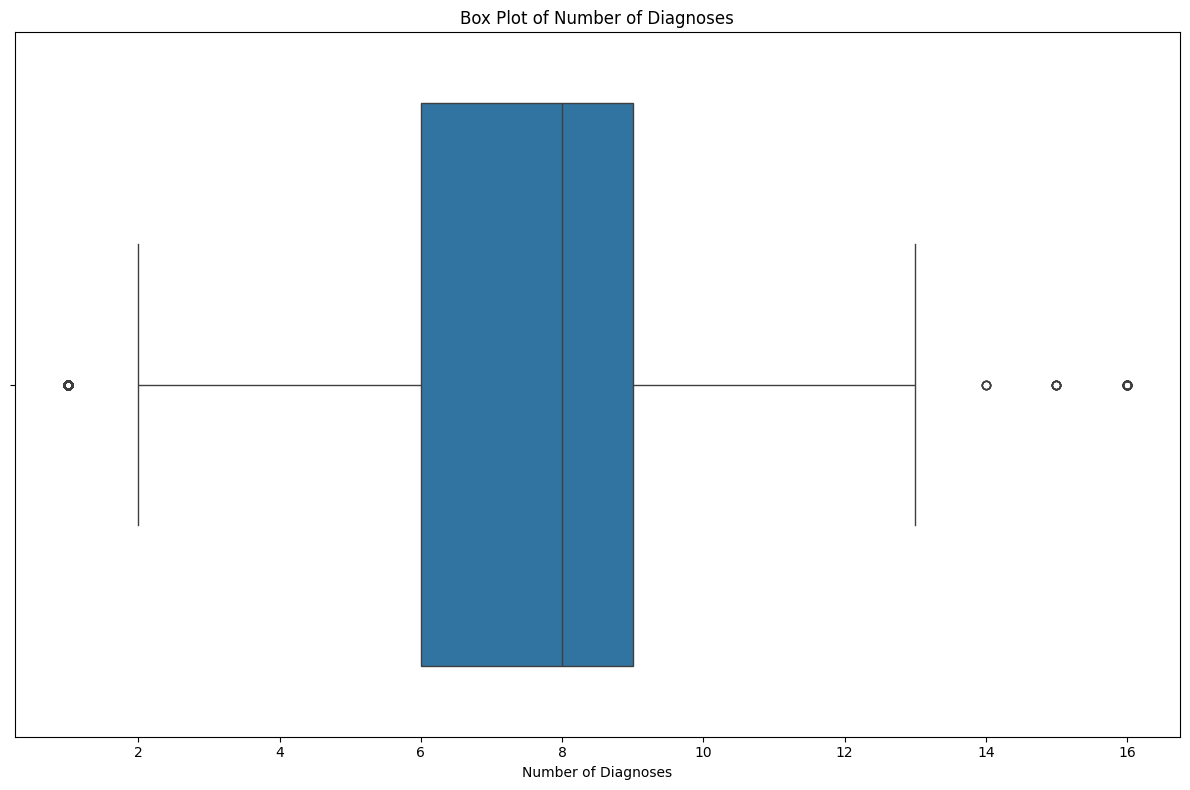

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='number_inpatient'>

Text(0.5, 1.0, 'Box Plot of Number of Inpatient Visits')

Text(0.5, 0, 'Number of Inpatient Visits')

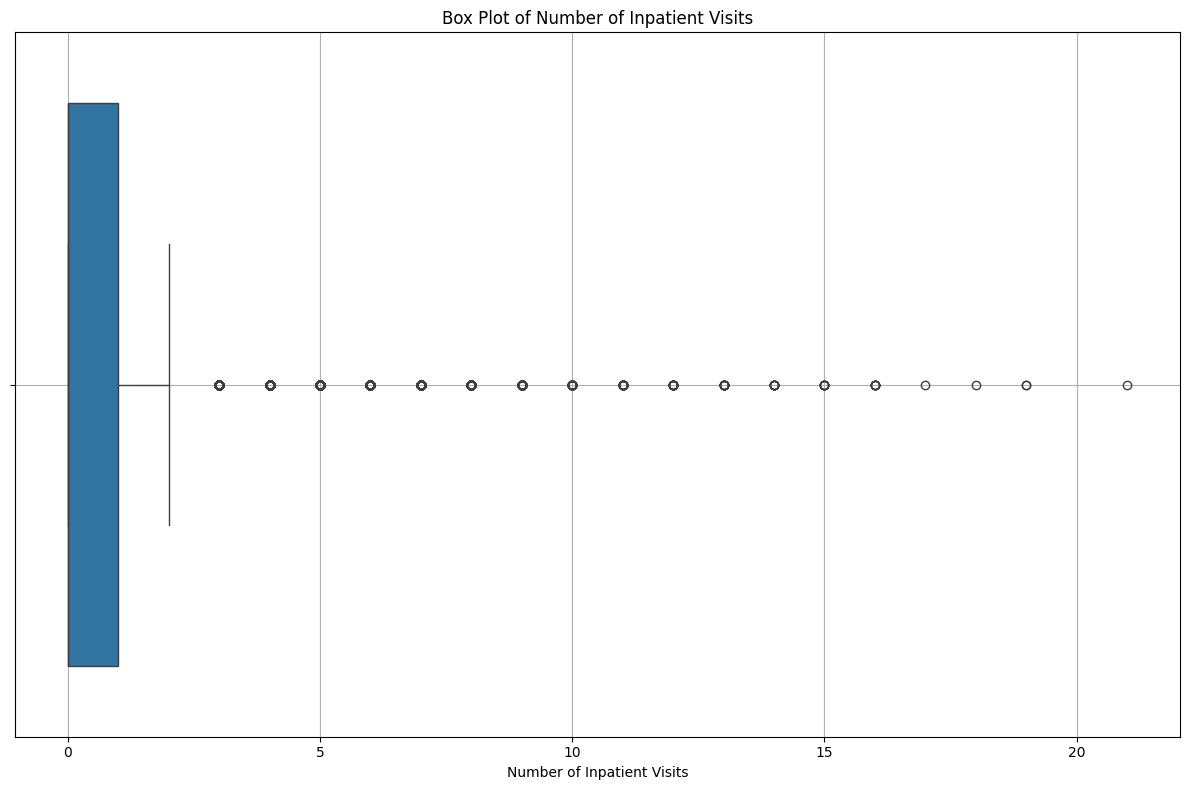

In [214]:
# Boxplts of the data that is most relevant to be seen this way

# Time in hospital
plt.figure(figsize=(25, 15))
sns.boxplot(x=df['time_in_hospital'])
plt.title('Box Plot of Time in Hospital')
plt.xlabel('Time in Hospital (days)')
plt.tight_layout()
plt.show()

# Number of lab procedures
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['num_lab_procedures'])
plt.title('Box Plot of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.tight_layout()
plt.show()

# Number of procedures
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['num_procedures'])
plt.title('Box Plot of Number of Procedures')
plt.xlabel('Number of Procedures')
plt.tight_layout()
plt.show()

# Number of medications
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['num_medications'])
plt.title('Box Plot of Number of Medications')
plt.xlabel('Number of Medications')
plt.tight_layout()
plt.show()

# Number of diagnoses
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['number_diagnoses'])
plt.title('Box Plot of Number of Diagnoses')
plt.xlabel('Number of Diagnoses')
plt.tight_layout()
plt.show()

# Number of inpatient visits
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['number_inpatient'])
plt.title('Box Plot of Number of Inpatient Visits')
plt.xlabel('Number of Inpatient Visits')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

<Axes: >

<ipython-input-215-b731fb865b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')


<Axes: xlabel='Readmitted', ylabel='time_in_hospital'>

Text(0.5, 1.0, 'Boxplot of time_in_hospital by Readmitted')

Text(0.5, 0, 'Readmitted')

Text(0, 0.5, 'time_in_hospital')

<Axes: >

<ipython-input-215-b731fb865b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')


<Axes: xlabel='Readmitted', ylabel='num_lab_procedures'>

Text(0.5, 1.0, 'Boxplot of num_lab_procedures by Readmitted')

Text(0.5, 0, 'Readmitted')

Text(0, 0.5, 'num_lab_procedures')

<Axes: >

<ipython-input-215-b731fb865b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')


<Axes: xlabel='Readmitted', ylabel='num_procedures'>

Text(0.5, 1.0, 'Boxplot of num_procedures by Readmitted')

Text(0.5, 0, 'Readmitted')

Text(0, 0.5, 'num_procedures')

<Axes: >

<ipython-input-215-b731fb865b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')


<Axes: xlabel='Readmitted', ylabel='num_medications'>

Text(0.5, 1.0, 'Boxplot of num_medications by Readmitted')

Text(0.5, 0, 'Readmitted')

Text(0, 0.5, 'num_medications')

<Axes: >

<ipython-input-215-b731fb865b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')


<Axes: xlabel='Readmitted', ylabel='number_inpatient'>

Text(0.5, 1.0, 'Boxplot of number_inpatient by Readmitted')

Text(0.5, 0, 'Readmitted')

Text(0, 0.5, 'number_inpatient')

<Axes: >

<ipython-input-215-b731fb865b7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')


<Axes: xlabel='Readmitted', ylabel='number_diagnoses'>

Text(0.5, 1.0, 'Boxplot of number_diagnoses by Readmitted')

Text(0.5, 0, 'Readmitted')

Text(0, 0.5, 'number_diagnoses')

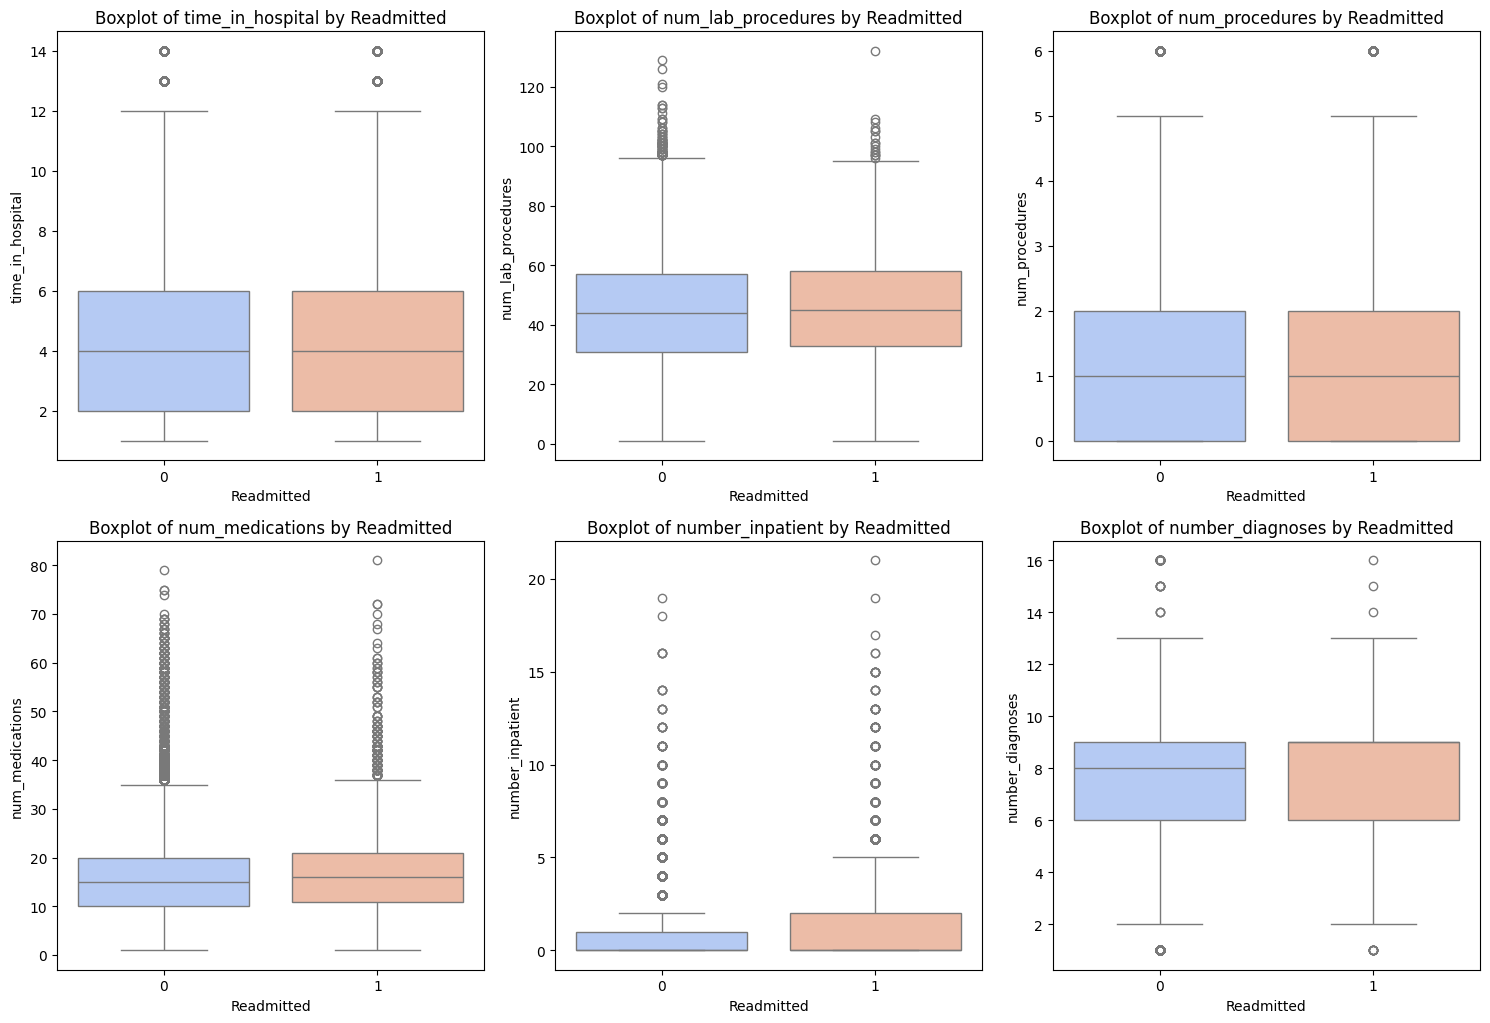

In [215]:
# Boxplots of numerical variables by Readmitted status
variables = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Readmitted', y=var, data=final_db, palette='coolwarm')
    plt.title(f'Boxplot of {var} by Readmitted')
    plt.xlabel('Readmitted')
    plt.ylabel(var)
    plt.legend([],[], frameon=False)  # Remove the legend

plt.tight_layout()
plt.show()

**BOXPLOTS OF NUMERICAL VARIABLES BY READMITTED STATUS**

Regarding the ‘time_in_hospital’, ‘num_lab_procedures’, ‘num_procedures’ and ‘num_diagnosis’ the distribution of data is similar between Non-Readmitted (0) and Readmitted (1) patients.

Considering the ‘num_medications’ one can observe a slight difference in the distribution of data in which the Readmitted (1) patients had more medication administered when compared with the Non-Readmitted (0) patients. The same happens with the ‘number_inpatient’, however there was a higher disparity between both groups, being in the Readmitted (1) patients.


After the data preparation/cleaning and analysis, the data was ready to be fitted into the models.

# **3 - Model Selection**

#3.1 - Linear regression

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Time in hospital')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Time in hospital')

<Axes: >

Text(0.5, 0, 'Num lab procedures')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Num lab procedures')

<Axes: >

Text(0.5, 0, 'Num procedures')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Num procedures')

<Axes: >

Text(0.5, 0, 'Num medications')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Num medications')

<Axes: >

Text(0.5, 0, 'Number outpatient')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number outpatient')

<Axes: >

Text(0.5, 0, 'Number emergency')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number emergency')

<Axes: >

Text(0.5, 0, 'Number inpatient')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number inpatient')

<Axes: >

Text(0.5, 0, 'Number diagnoses')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number diagnoses')

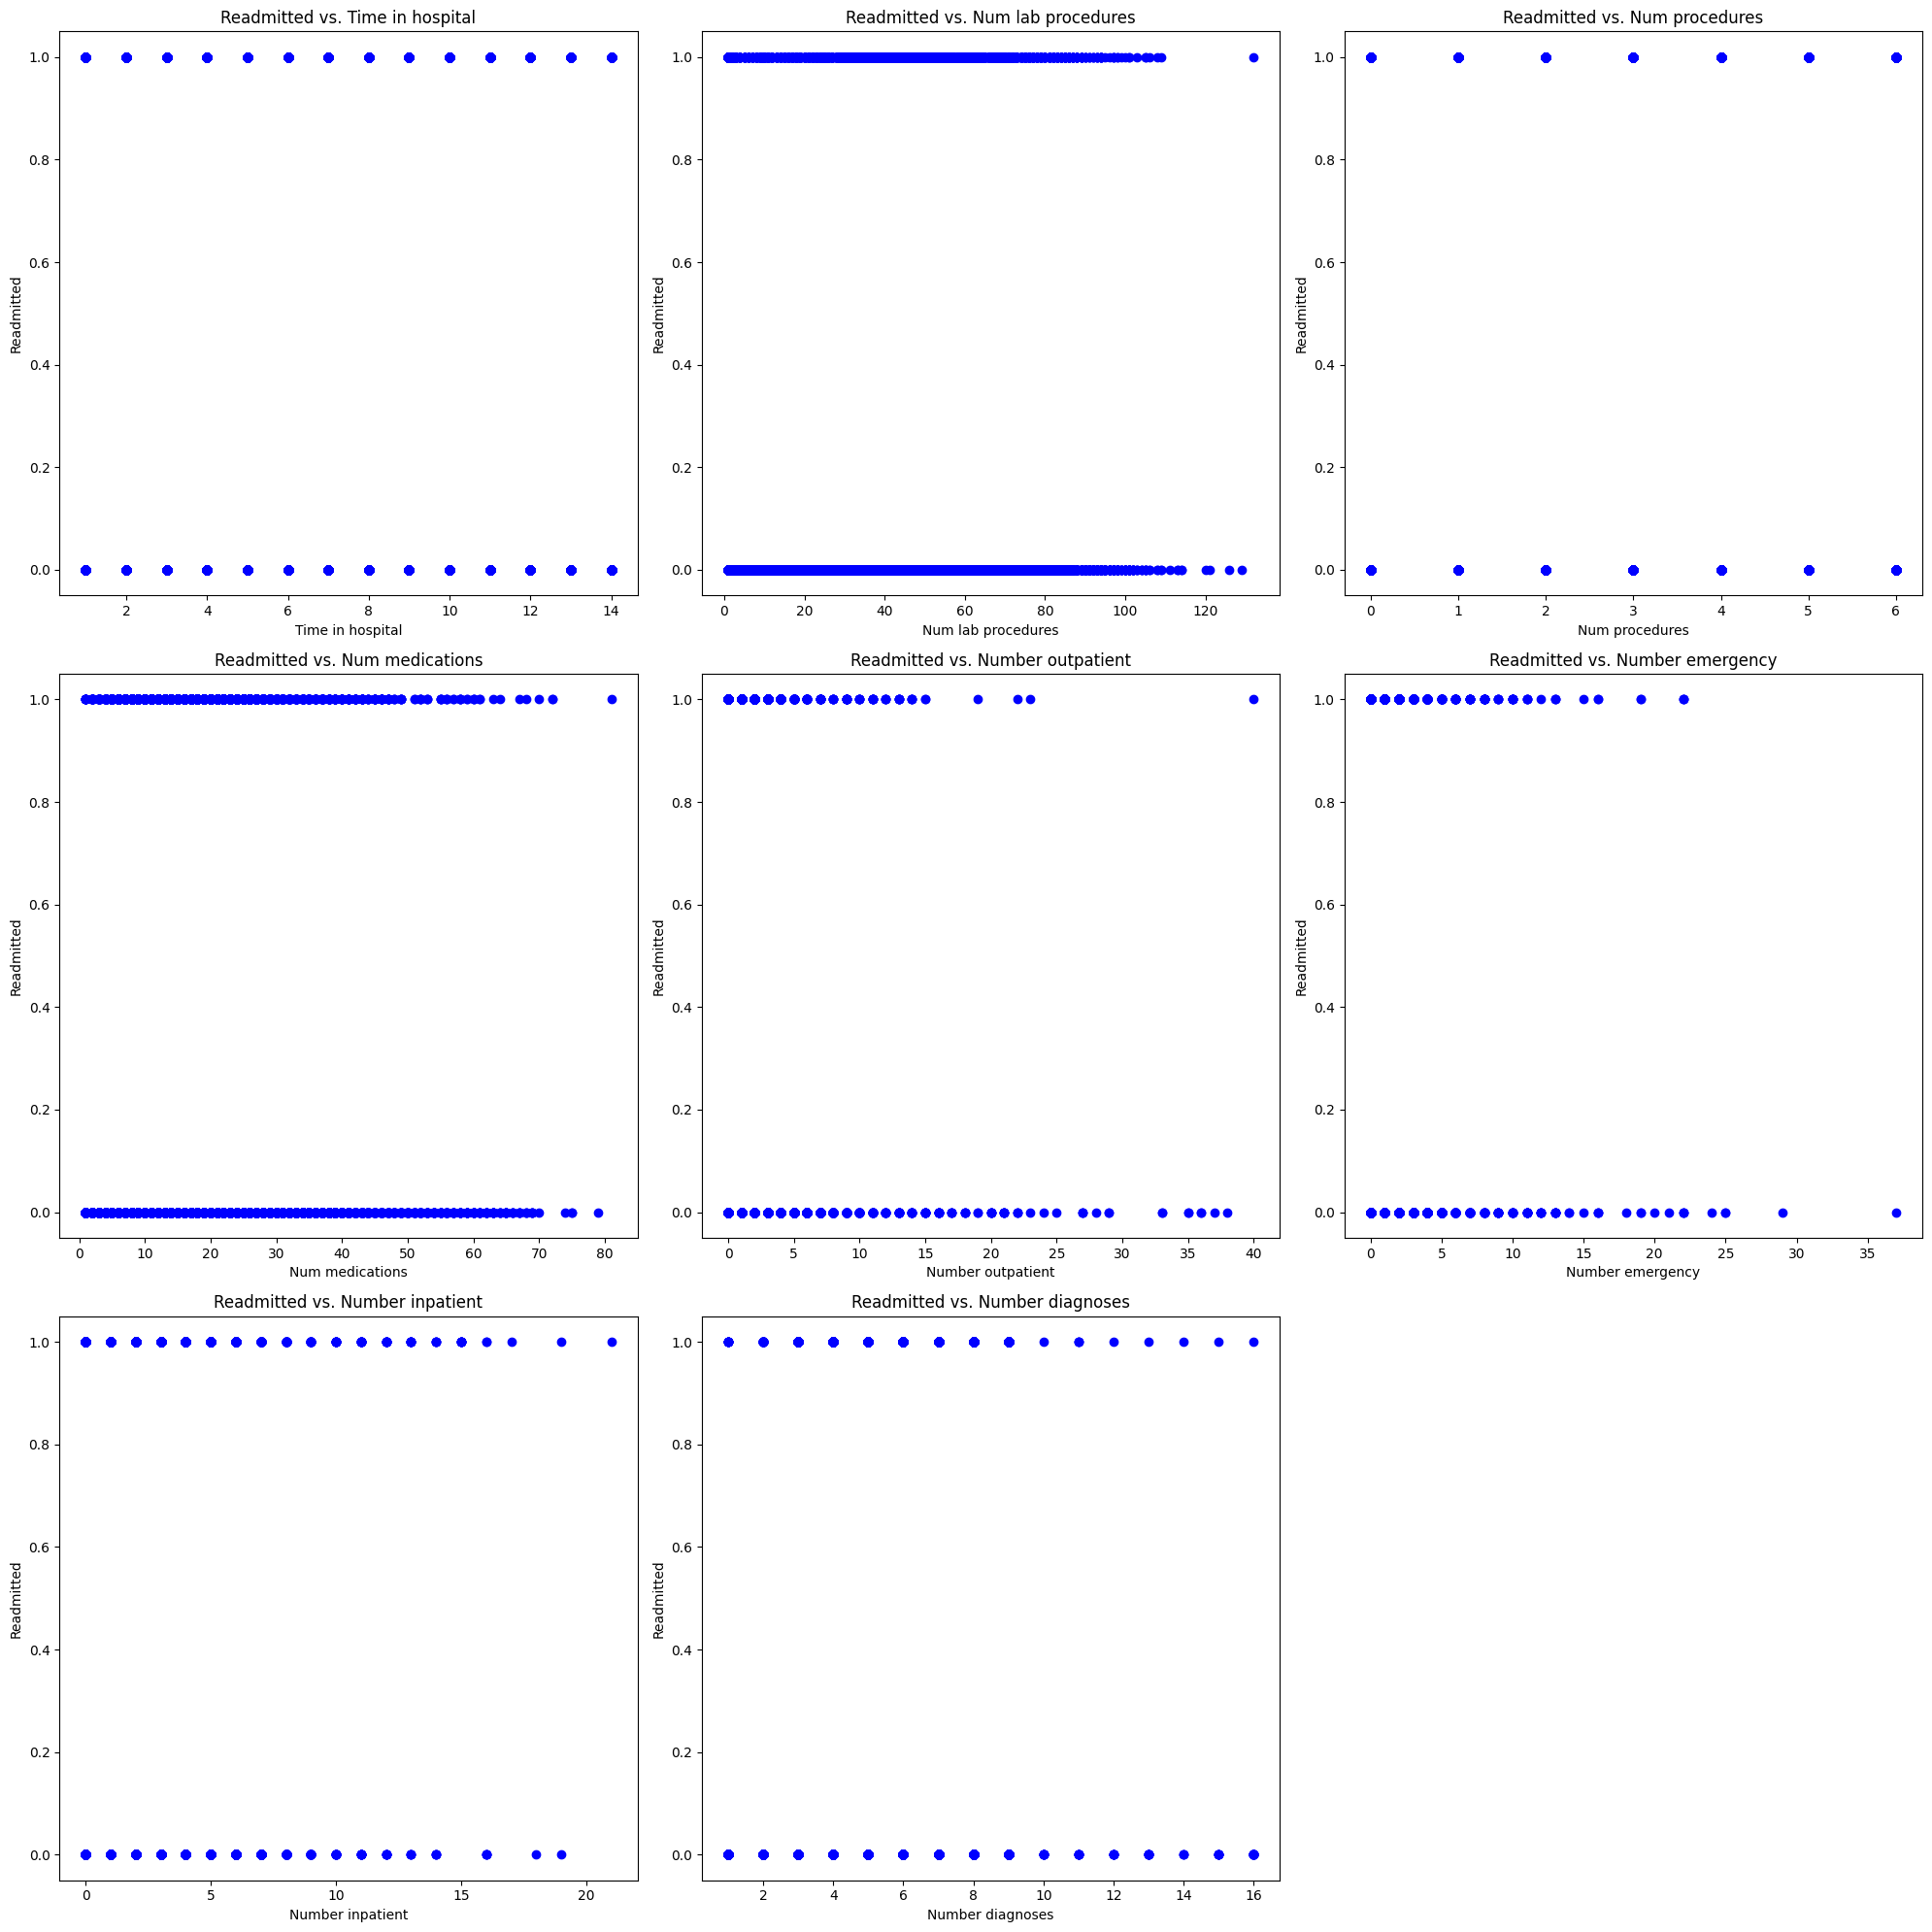

In [216]:
numerical_variables = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'] # List of numerical variables

plt.figure(figsize=(20, 20)) # Set the figure size for the plot

# Loop through each numerical variable and create a scatter plot against "Readmitted"
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(3, 3, i)
    plt.scatter(final_db[var], final_db['Readmitted'], color='blue')
    plt.xlabel(var.replace('_', ' ').capitalize())
    plt.ylabel('Readmitted')
    plt.title(f'Readmitted vs. {var.replace("_", " ").capitalize()}')

plt.tight_layout()
plt.show()

LinearRegression()

Coefficients: [ 1.64321528e-03  7.71220848e-05 -2.37795942e-03  9.83157507e-04
  1.79798057e-03  1.25302324e-02  3.56331528e-02  3.17925617e-03]
Intercept: 0.03791190887878891
Mean Squared Error: 0.09527722066991408
R² Score: 0.028754661315921415


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual Readmitted')

Text(0, 0.5, 'Predicted Readmitted')

Text(0.5, 1.0, 'Actual vs Predicted Readmitted')

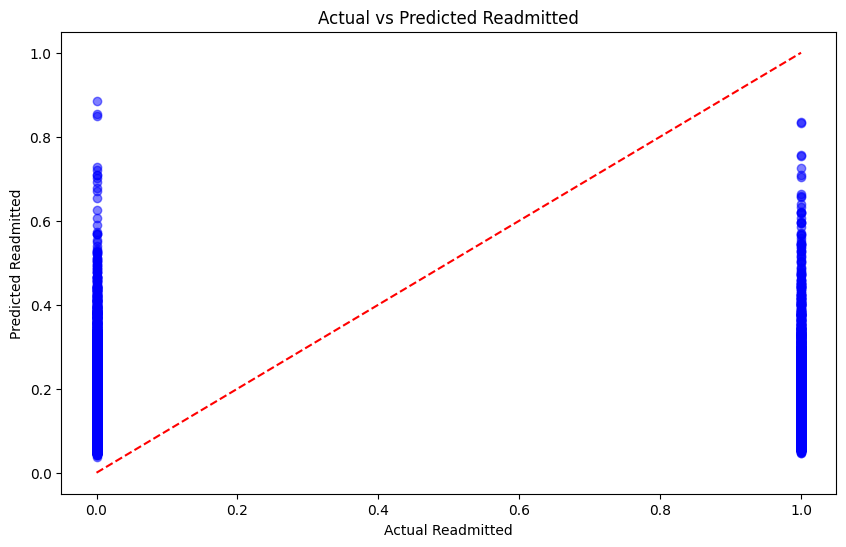

In [217]:
# Define the independent variables (X) and dependent variable (y)
X = final_db[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]
y = final_db['Readmitted']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot the predicted vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Readmitted')
plt.ylabel('Predicted Readmitted')
plt.title('Actual vs Predicted Readmitted')
plt.show()

In [218]:
# Prepare the data for modeling
X = final_db[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]  # Independent variables
y = final_db['Readmitted']  # Dependent variable

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [219]:
# Interpret the models coefficients

# Get the intercept (beta_0) from the model
beta_0 = model.intercept_

# Get the coefficients for each feature from the model
coefficients = model.coef_

# Assign each coefficient to the variabel for easier interpretation
beta_1 = coefficients[0]
beta_2 = coefficients[1]
beta_3 = coefficients[2]
beta_4 = coefficients[3]
beta_5 = coefficients[4]
beta_6 = coefficients[5]
beta_7 = coefficients[6]
beta_8 = coefficients[7]

In [220]:
# Use statsmodels to get detailed summary including p-values
# Statsmodel is a package for estimating different statistical models
X_statsmodels = sm.add_constant(X)  # Add constant for intercept
model_statsmodels = sm.OLS(y, X_statsmodels)
results_statsmodels = model_statsmodels.fit()
p_values = results_statsmodels.pvalues

In [221]:
p_values

const                 8.954935e-21
time_in_hospital      2.488851e-08
num_lab_procedures    7.801910e-01
num_procedures        1.340174e-05
num_medications       8.348591e-05
number_outpatient     6.606239e-01
number_emergency      1.102203e-05
number_inpatient      0.000000e+00
number_diagnoses      1.300428e-08
dtype: float64

In [222]:
# Print coefficients and p-values together -> como fazer esta parte??????????
print(f"Intercept (beta_0): {beta_0:.2f} (p-value: {p_values.iloc[0]:.4f})")
print(f"Slope (beta_1): {beta_1:.2f} (p-value: {p_values.iloc[1]:.4f})")
print(f"Slope (beta_2): {beta_2:.2f} (p-value: {p_values.iloc[2]:.4f})")
print(f"Slope (beta_3): {beta_3:.2f} (p-value: {p_values.iloc[3]:.4f})")
print(f"Slope (beta_4): {beta_4:.2f} (p-value: {p_values.iloc[4]:.4f})")
print(f"Slope (beta_5): {beta_5:.2f} (p-value: {p_values.iloc[5]:.4f})")
print(f"Slope (beta_6): {beta_6:.2f} (p-value: {p_values.iloc[6]:.4f})")
print(f"Slope (beta_7): {beta_7:.2f} (p-value: {p_values.iloc[7]:.4f})")
print(f"Slope (beta_8): {beta_8:.2f} (p-value: {p_values.iloc[8]:.4f})")

Intercept (beta_0): 0.04 (p-value: 0.0000)
Slope (beta_1): 0.00 (p-value: 0.0000)
Slope (beta_2): -0.00 (p-value: 0.7802)
Slope (beta_3): -0.00 (p-value: 0.0000)
Slope (beta_4): 0.00 (p-value: 0.0001)
Slope (beta_5): -0.00 (p-value: 0.6606)
Slope (beta_6): 0.01 (p-value: 0.0000)
Slope (beta_7): 0.04 (p-value: 0.0000)
Slope (beta_8): 0.00 (p-value: 0.0000)


In [223]:
# Optionally, print the prediction equation
print(f"The linear regression equation is: y = {beta_0:.2f} + {beta_1:.2f} * time_in_hospital + {beta_2:.2f} *num_lab_procedures + {beta_3:.2f} * num_procedures + {beta_4:.2f} * num_medications + {beta_5:.2f} * number_outpatient + {beta_6:.2f} * number_emergency + {beta_7:.2f} * number_diagnoses")

The linear regression equation is: y = 0.04 + 0.00 * time_in_hospital + -0.00 *num_lab_procedures + -0.00 * num_procedures + 0.00 * num_medications + -0.00 * number_outpatient + 0.01 * number_emergency + 0.04 * number_diagnoses


In [224]:
# Means of the independent variables
mean_time_in_hospital = np.mean(final_db['time_in_hospital'])
mean_num_lab_procedures = np.mean(final_db['num_lab_procedures'])
mean_num_medications = np.mean(final_db['num_medications'])
mean_number_outpatient = np.mean(final_db['number_outpatient'])
mean_number_emergency = np.mean(final_db['number_emergency'])
mean_number_inpatient = np.mean(final_db['number_inpatient'])
mean_number_diagnoses = np.mean(final_db['number_diagnoses'])

# Linear regression coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]
beta_3 = model.coef_[2]
beta_4 = model.coef_[3]
beta_5 = model.coef_[4]
beta_6 = model.coef_[5]
beta_7 = model.coef_[6]
beta_8 = model.coef_[7]

LinearRegression()

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Time in hospital')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Time in hospital')

<Axes: >

Text(0.5, 0, 'Num lab procedures')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Num lab procedures')

<Axes: >

Text(0.5, 0, 'Num procedures')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Num procedures')

<Axes: >

Text(0.5, 0, 'Num medications')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Num medications')

<Axes: >

Text(0.5, 0, 'Number outpatient')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number outpatient')

<Axes: >

Text(0.5, 0, 'Number emergency')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number emergency')

<Axes: >

Text(0.5, 0, 'Number inpatient')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number inpatient')

<Axes: >

Text(0.5, 0, 'Number diagnoses')

Text(0, 0.5, 'Readmitted')

Text(0.5, 1.0, 'Readmitted vs. Number diagnoses')

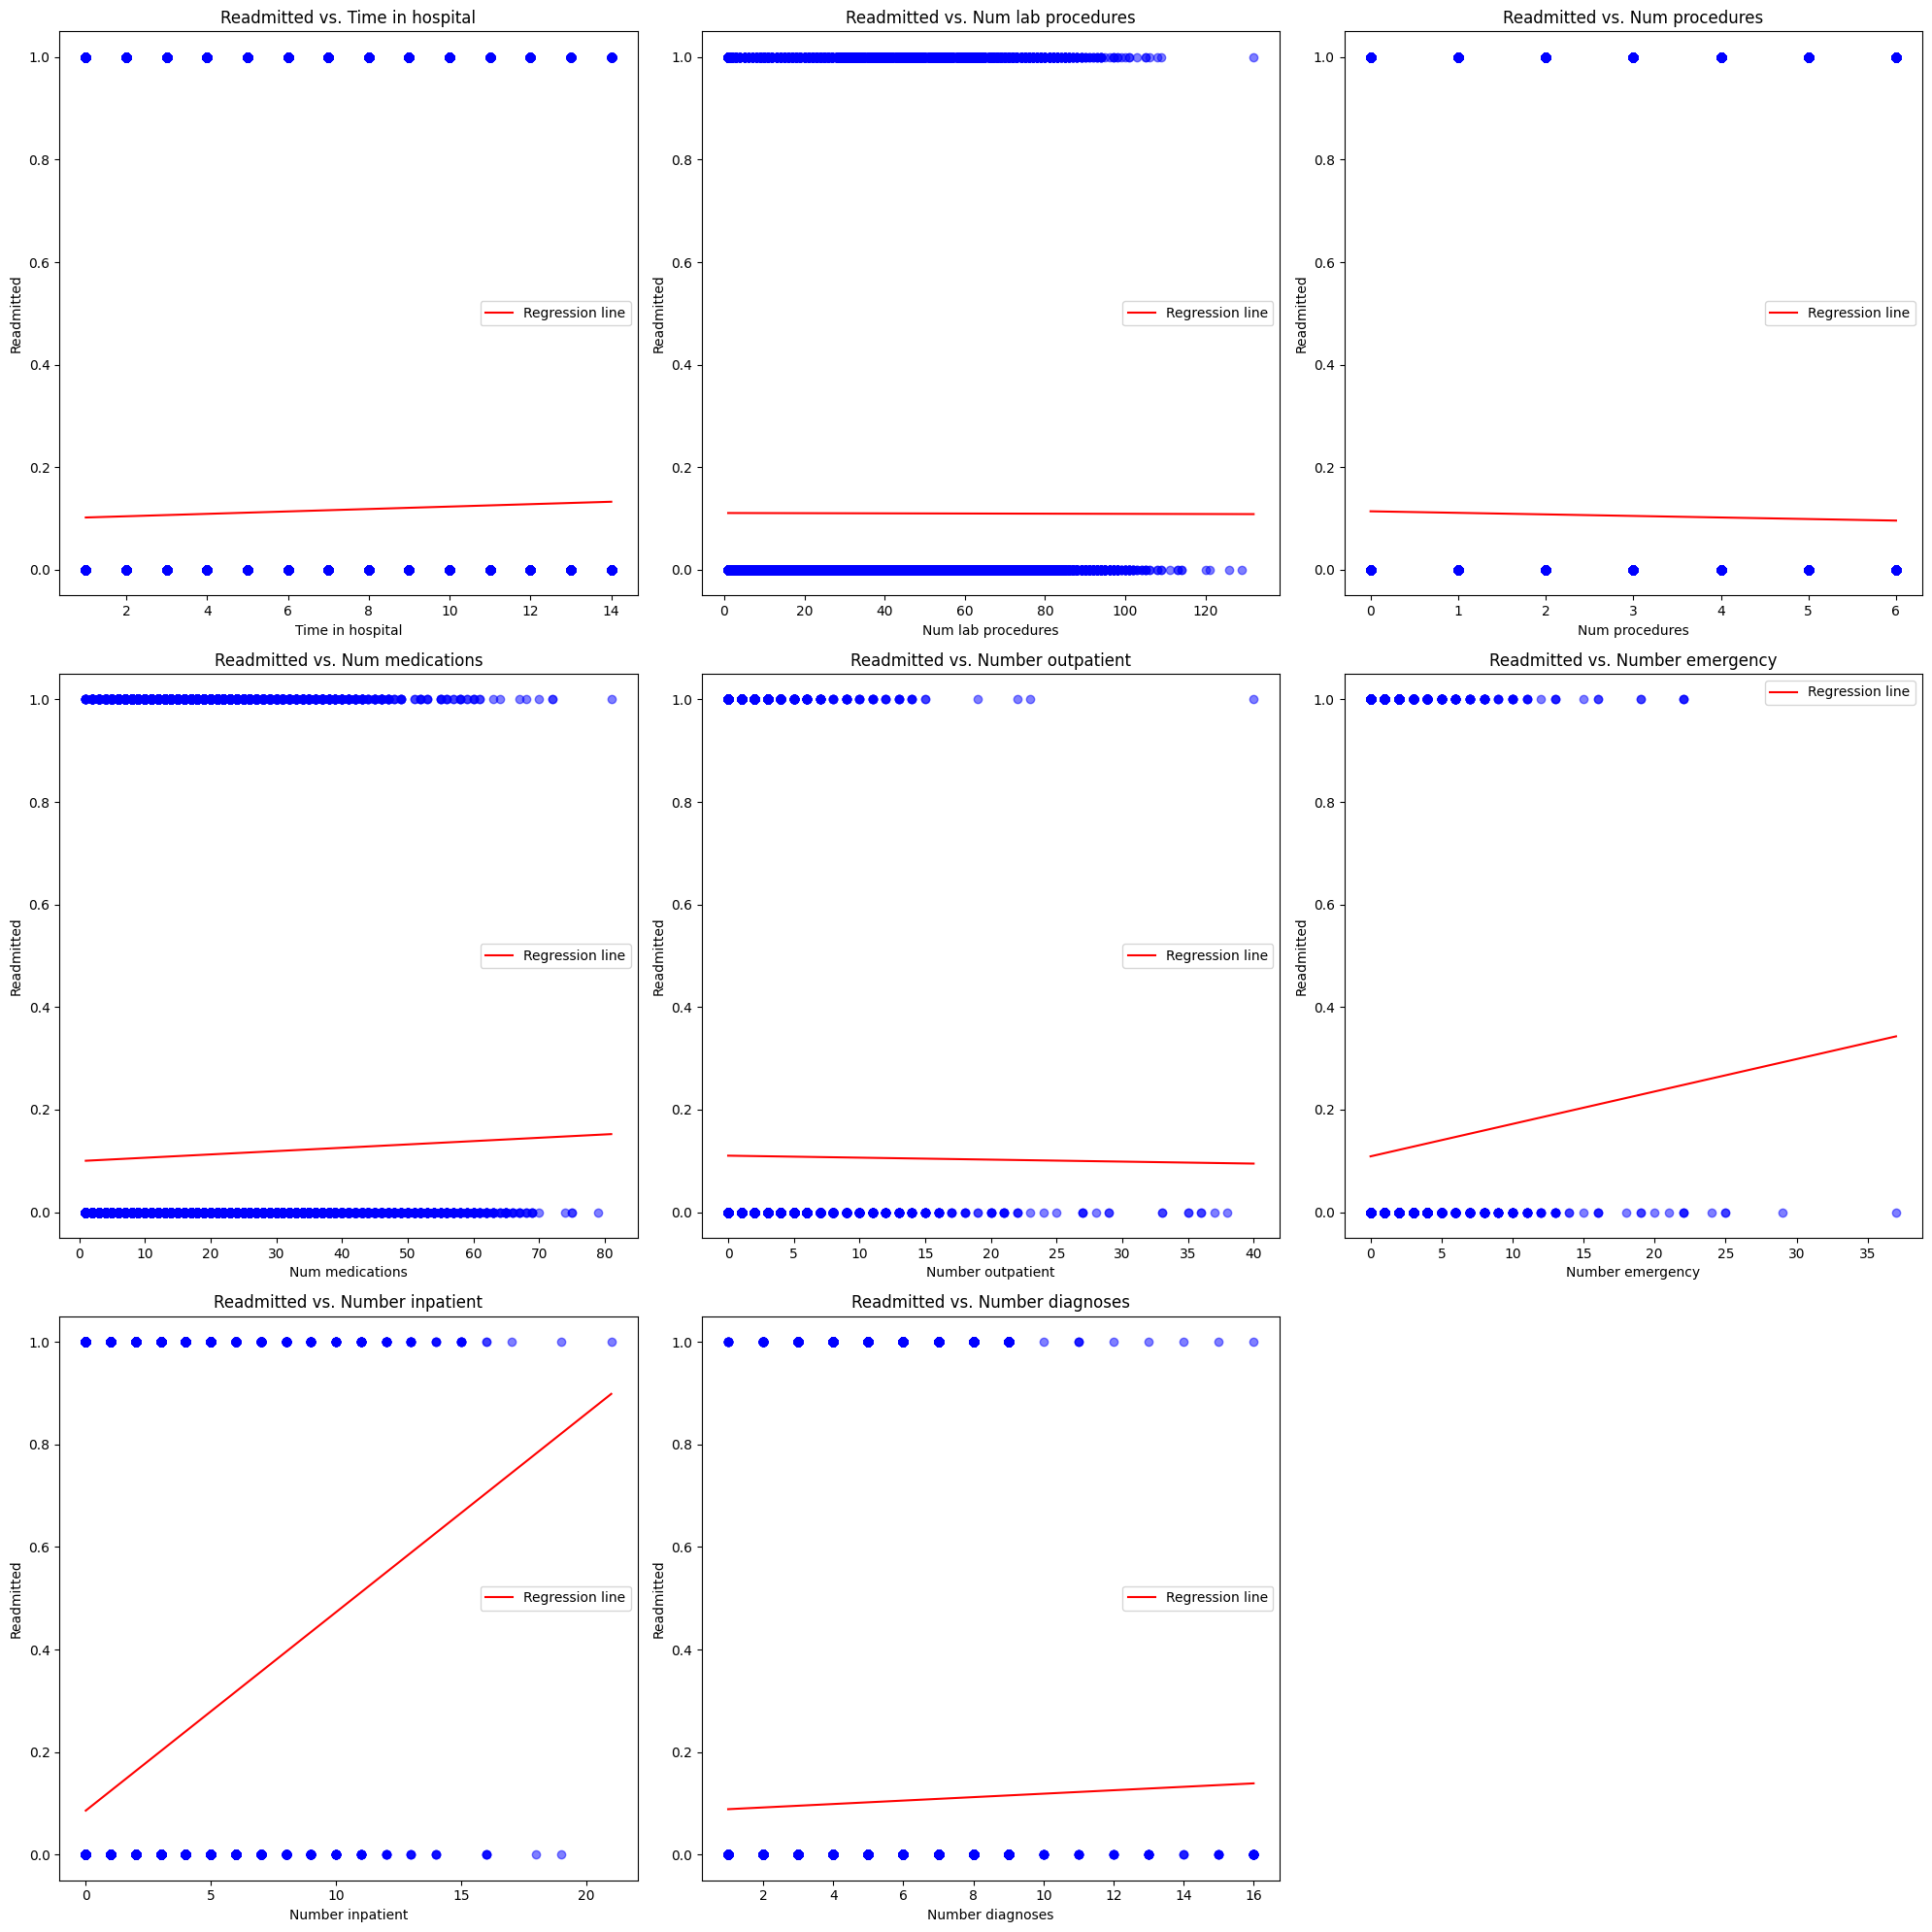

In [225]:
# Define the independent variables (X) and dependent variable (y)
X = final_db[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]
y = final_db['Readmitted']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
beta_0 = model.intercept_
betas = model.coef_

# Mean values of the variables
mean_values = X.mean()

# Function to compute predicted Readmission
def predict_readmission(X, beta_0, betas):
    return beta_0 + np.dot(X, betas)

# Prepare plots for each variable
variables = X.columns
num_vars = len(variables)

plt.figure(figsize=(20, 20))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)

    # Prepare the range for the variable
    var_range = np.linspace(X[var].min(), X[var].max(), 100)

    # Prepare the input data by keeping other variables constant at their mean values
    X_const = np.tile(mean_values, (100, 1))
    X_const[:, i-1] = var_range

    # Predict Readmission
    y_pred = predict_readmission(X_const, beta_0, betas)

    plt.scatter(X[var], y, color='blue', alpha=0.5)
    plt.plot(var_range, y_pred, color='red', label='Regression line')
    plt.xlabel(var.replace('_', ' ').capitalize())
    plt.ylabel('Readmitted')
    plt.title(f'Readmitted vs. {var.replace("_", " ").capitalize()}')
    plt.legend()

plt.tight_layout()
plt.show()

**How good is the linear regression model?**

In [226]:
# Predict the target variable using the trained model
y_predict = model.predict(X)

In [227]:
# Calculate the mean squared error between the actual and predicted values
mse = mean_squared_error(y, y_predict)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.10


In [228]:
# Calculate the R^2 score (coefficient of determination) to evaluate the model
r2 = r2_score(y, y_predict)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.03


**LINEAR REGRESSION**

After the data preparation/cleaning and analysis, the Linear Regression model was applied, by fitting the model.
The dataset was divided into training and validation/testing sets, in a ratio of 80/20, in a random state.

To check for how good the Linear Regression model is, the mean squared error between the actual and predicted values and coefficient of determination were calculated.
The mean squared error value of 0,095 might indicate a moderate level of error.
The coefficient of determination, basically defines the goodness f the fit of the model and ranges from 0 to 1, being one the best value. Therefore, a R^2 of 0,029 means that 2,9% of the variance in the dependent variable is explained by the independent variables in the model. So, it is not good to predict the model.

Being y the ‘Readmitted’ variable, and since it is a binary variable, Non-Readmitted (0) and Readmitted (1), the Linear Regression model that was created was already expected no to reveal to be useful because no Linear Regression could be found. This fact was confirmed by the values of mean squared error (mse) and coefficient of determination (R^2).


# 3.2 - Logistic Regression

**Purpose and Application**
- Logistic regression is used for binary classification, predicting probabilities between 0 and 1 for a given input of independent variables.
- In this project, logistic regression was employed to predict the probability of the event "readmitted within 30 days." The goal of the model is to predict whether a patient is likely to be readmitted (1) or not (0).

In [229]:
X = final_db.drop('Readmitted', axis=1) # Drop the "Readmitted" column from the dataset to create the feature matrix X
y = final_db['Readmitted'] # Set the target variable Y to the "Readmitted" column

# define sklearn pipeline for one hot encoder only of category columns

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# create pipeline with preprocessor plus logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

**Model Setup**
- The final_db dataset was processed to separate the predictors (independent variables) from the target variable (Readmitted).

**Categorical Variable Processing:**
- Many machine learning models cannot handle categorical data directly. Hence, categorical variables were transformed into numerical values using One-Hot Encoding. For instance, the gender could not be interpreted as female, male, or unknown, and was instead encoded into separate columns with values 0 or 1.

**Numerical Variable Processing:**
- Numerical data often have different scales, which can affect model performance. For instance, 'num_lab_procedures' ranges from 1 to 132, while 'num_procedures' ranges from 0 to 6. StandardScaler was used to standardize the data, ensuring all features contribute equally to the model.

Transformations were then applied to the respective columns using ColumnTransformer.

Lastly, a pipeline was created for the entire machine learning workflow, combining preprocessing steps and logistic regression model fitting. The pipeline automates preprocessing and model training, ensuring consistency and reducing the risk of errors.


## Train and test

In [230]:
# Split the data into training and testing sets, with 20% of the data used for testing and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [231]:
# Checking the shapes to get an understanding of the problem
print( X_train.shape, X_test.shape )
print( y_train.shape, y_test.shape )

(64940, 24) (16236, 24)
(64940,) (16236,)


**Train and test split**
- The dataset was divided into 80% for training and 20% for testing.
  - An 80% training set allows the model to learn from a larger dataset and capture patterns more effectively. However, a 20% test set might not be fully representative of the overall data distribution, potentially affecting the generalizability of the model.

**Feature scaling or standardisation:** Feature scaling is important for models like logistic regression for several reasons:

**Effect of Magnitude:** Features with larger magnitudes can dominate the model, leading to biased coefficients.

**Convergence:** Scaling can help the optimization algorithm (used in model training) converge faster.

**Interpretation:** It ensures that coefficients represent the relative importance of features rather than their scale.

In [232]:
# Check the distribution of target variable in the training set
y_train.value_counts()

Readmitted
0    57822
1     7118
Name: count, dtype: int64

In [233]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'diabetesMed',
       'insulin_taken', 'insulin_change', 'other_meds', 'other_meds_change'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [234]:
# Make predictions on the test set, predict the target variable using the test data
y_predict = pipeline.predict(X_test)

In [235]:
# Display the predictions
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [236]:
# Convert the test target variable to numpy array
y_test.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

**Training the model**

- The pipeline was trained on the training data.
- Predictions were made on the test set.

In [237]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_predict)

# Print the accuracy of the model
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.89


Text(0.5, 1.0, 'Confusion Matrix')

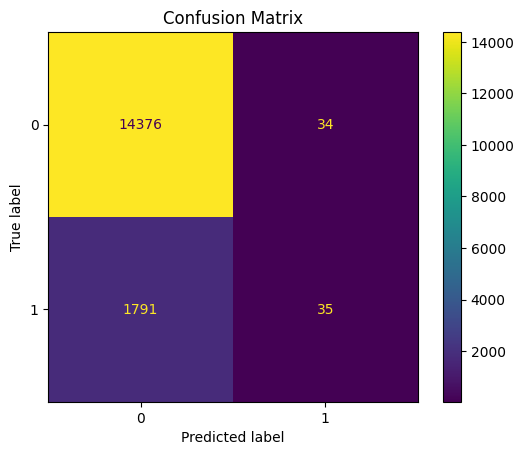

In [238]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [239]:
# Calculate recall
recall = recall_score(y_test, y_predict)

# Print the recall score
print(f"Logistic Regression Recall: {recall:.2f}")

Logistic Regression Recall: 0.02


In [240]:
# Calculate precision
precision = precision_score(y_test, y_predict)

# Print the precision score
print(f"Logistic Regression Precision: {precision:.2f}")

Logistic Regression Precision: 0.51


In [241]:
# Calculate F1 score
f1 = f1_score(y_test, y_predict)

# Print the F1 score
print(f"Logistic Regression F1 Score: {f1:.2f}")

Logistic Regression F1 Score: 0.04


## Random search

**Random Search and Hyperparameter Tuning:**
- Hyperparameter tuning involves exploring the hyperparameter space of a machine learning model to find a combination that optimizes performance.
- Random search samples a fixed number of hyperparameter combinations from specified distributions, unlike grid search, which tries every possible combination. Random search was chosen for efficiency due to time constraints, sacrificing exhaustive analysis for faster results.
- After random search, the model was trained with the best hyperparameters found.

In [242]:
# Define a dictionary with parameter grid for hyperparameter tuning
param_random = {
    'classifier__C': np.logspace(-4, 4, 10),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': ['balanced', None],
    'classifier__solver': ['liblinear']
}

In [243]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])


random = RandomizedSearchCV(pipeline, # The model
                            n_iter=3,
                            param_distributions=param_random, # The parameter grid
                            cv=3, # How many folds are wanted in the cross-validation
                            scoring='f1', # What scoring metric is wished
                            verbose=3, # To show the messages during training
                            )

In [244]:
random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END classifier__C=2.782559402207126, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear;, score=0.039 total time=  10.7s
[CV 2/3] END classifier__C=2.782559402207126, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear;, score=0.052 total time=  13.8s
[CV 3/3] END classifier__C=2.782559402207126, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear;, score=0.039 total time=   3.9s
[CV 1/3] END classifier__C=2.782559402207126, classifier__class_weight=balanced, classifier__penalty=l1, classifier__solver=liblinear;, score=0.265 total time= 1.2min
[CV 2/3] END classifier__C=2.782559402207126, classifier__class_weight=balanced, classifier__penalty=l1, classifier__solver=liblinear;, score=0.261 total time= 1.5min
[CV 3/3] END classifier__C=2.782559402207126, classifier__class_weight=balanced, classifier__penalty=l1, classifier__s

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=...
                                              LogisticRegression())]),
                   n_iter=3,
                   param_distributions={'classifier__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'classifier__class_weight': ['balanced',
                                                                     None],
                                        'classifier__penalty': ['l1', 'l2'],
                                        'classifier__solver': ['liblinear']},
                   scoring='f1', verbose=3)

In [245]:
penalty = 'l2'
solver = 'liblinear'
class_weight = 'balanced'
C = 21.544347


In [246]:
# Create a DataFrame from cross-validation results and sort by rank of test score
results = pd.DataFrame(random.cv_results_).sort_values('rank_test_score')
results.head(10)
results.shape

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__solver,param_classifier__penalty,param_classifier__class_weight,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,8.743464,0.756745,0.531620,0.083971,liblinear,l2,balanced,21.544347,"{'classifier__solver': 'liblinear', 'classifie...",0.264774,0.261328,0.262576,0.262893,0.001425,1
1,73.054188,12.668578,0.594392,0.062305,liblinear,l1,balanced,2.782559,"{'classifier__solver': 'liblinear', 'classifie...",0.265308,0.260648,0.261870,0.262609,0.001973,2
0,8.934920,4.146650,0.519061,0.074827,liblinear,l1,None,2.782559,"{'classifier__solver': 'liblinear', 'classifie...",0.038710,0.051834,0.039405,0.043316,0.006030,3


(3, 15)

**Fit, Train, and Test the New Model:**
- The process was repeated with the new model to evaluate improvements in metrics.
- The accuracy decreased slightly, but recall increased significantly while precision decreased. The F1 score improved from 0.04 to 0.27, indicating a better balance between precision and recall.
- The confusion matrix showed that the new model maintained true negatives, decreased false negatives, and increased both false positives and true positives compared to the initial model.


In [247]:
# Extract the best model from grid search
#best_model_LR = random.best_estimator_
penalty = 'l2'
solver = 'liblinear'
class_weight = 'balanced'
C = 21.544347

best_model_LR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(penalty=penalty, solver=solver, class_weight=class_weight, C=C))])

best_model_LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_un...
                                                                                 sparse_output=False))]),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'diabetesMed',
       'insulin_taken', 'insulin_change', 'other_meds', 'other_meds_change'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=21.544347, class_weight='balanced',
                                    solver='liblinear'))])

In [248]:
# Display the best model
best_model_LR

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_un...
                                                                                 sparse_output=False))]),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'diabetesMed',
       'insulin_taken', 'insulin_change', 'other_meds', 'other_meds_change'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=21.544347, class_weight='balanced',
                                    solver='liblinear'))])

In [249]:
# Make predictions on the test set again with the best model
y_predict_LR = best_model_LR.predict(X_test)

In [250]:
# Display the predicted values
y_predict_LR

array([0, 0, 1, ..., 0, 0, 0])

In [251]:
# Convert y_test to a numpy array for comparison
y_test.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [252]:
# Calculate the accuracy of the best model on the test set
accuracy = accuracy_score(y_test, y_predict_LR)

# Print the accuracy of the best model on the test set
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.65


In [253]:
# Calculate recall
recall = recall_score(y_test, y_predict_LR)

# Print the recall score
print(f"Logistic Regression Recall: {recall:.2f}")

Logistic Regression Recall: 0.58


In [254]:
# Calculate precision
precision = precision_score(y_test, y_predict_LR)

# Print the precision score
print(f"Logistic Regression Precision: {precision:.2f}")

Logistic Regression Precision: 0.18


In [255]:
# Calculate F1 score
f1 = f1_score(y_test, y_predict_LR)

# Print the F1 score
print(f"Logistic Regression F1 Score: {f1:.2f}")

Logistic Regression F1 Score: 0.27


Text(0.5, 1.0, 'Confusion Matrix')

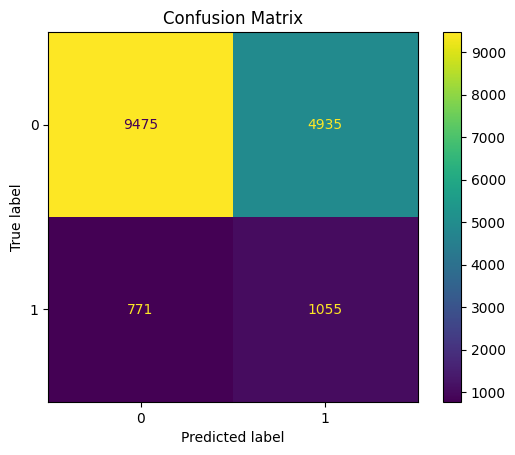

In [256]:
# Compute the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_predict_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_LR.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [257]:
probas_LR = best_model_LR.predict_proba(X_test)[:,1] # Get the predicted probabilities for the positive class
ths = np.arange(0.1,1,step=0.1) # Define a range of decision thresholds from 0.1 to 0.9
ths # Display

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

- Predicted probabilities for the positive class were analyzed within a range from 0.1 to 0.9.
- Different thresholds were evaluated to determine which provided the best metric scores.

## Treshold analysis

In [258]:
# Initialize an empty list to store results
results = []

# Loop to iterate over each threshold
for decision_threshold in ths:
    th_preds = (probas_LR > decision_threshold).astype(int) # Generate predictions based on the current threshold
    recall = recall_score(y_test, th_preds) # Calculate recall for the current threshold
    precision = precision_score(y_test, th_preds) # Calculate precision for the current threshold
    f1= f1_score(y_test, th_preds) # Calculate F1 score for the current threshold

    results.append({"decision_threshold":decision_threshold,"recall":recall,"precision":precision,"f1":f1}) # Append results to the list

results = pd.DataFrame(results).set_index('decision_threshold') # Convert results list to DataFrame and set decision_threshold as the index
results # Display

,recall,precision,f1
decision_threshold,,,
0.1,0.982475,0.115466,0.206646
0.2,0.973165,0.117240,0.209268
0.3,0.929354,0.124386,0.219407
0.4,0.794085,0.144164,0.244026
0.5,0.577766,0.176127,0.269959
0.6,0.364732,0.222594,0.276463
0.7,0.190033,0.269619,0.222936
0.8,0.087076,0.341202,0.138743
0.9,0.024644,0.494505,0.046948


**Threshold Analysis:**
- A threshold of 0.1 yielded the best recall but the worst precision. - A threshold of 0.4 significantly decreased recall with little change in precision. The best F1 score was observed at a threshold of 0.5, balancing higher recall with improved precision.
- Future work could further explore decision thresholds to optimize results.

## Shap values

In [259]:
!pip install shap

In [260]:
# Initialize shap
import shap
shap.initjs()

In [261]:
clf = LogisticRegression(C=21.544347, class_weight='balanced', solver='liblinear')
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'AfricanAmerican'

In [ ]:
# Initialize the SHAP explainer -> we do not know how to replace the "clf" with the X appropriate for this case becuase of the Pipeline
explainer_LR = shap.LinearExplainer(clf, X_train)

In [ ]:
# Compute the shap values for the X_test dataset
shap_values_LR = explainer_LR.shap_values(X_test)

In [ ]:
# Plot summary_plot of shap
shap.summary_plot(shap_values_LR, X_test, feature_names=X_test.columns)

In [ ]:
# Plot summary_plot with bars
shap.summary_plot(shap_values_LR, X_test, feature_names=X_test.columns, plot_type='bar')

##Submission

Read test data


In [262]:
backup_teste =  pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Final%20Project/data/test_no_labels.csv')


In [263]:
test_df = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Final%20Project/data/test_no_labels.csv')
test_df.head(3)
test_df.shape

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change
0,63768,85134888,Caucasian,Male,[70-80),1,1,7,5,Unknown,73,0,12,0,0,0,108.0,127.0,49.0,8,Unknown,Yes,No,No,Yes,No
1,36900,88157835,AfricanAmerican,Male,[60-70),2,1,4,7,Unknown,62,0,11,0,0,0,17.0,63.0,42.0,7,Unknown,Yes,Yes,No,Yes,Yes
2,62256,23782419,AfricanAmerican,Female,[60-70),3,1,2,1,Unknown,49,5,2,0,0,0,130.0,238.0,173.0,8,Unknown,Yes,Yes,No,No,No


(20590, 26)

Apply the same data procesing you did to your training data

In [264]:
test_df = test_df.drop(columns=['encounter_id','patient_nbr'])


test_df.fillna("Unknown", inplace = True)

test_df['admission_type_id'] = test_df['admission_type_id'].astype('object')
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].astype('object')
test_df['admission_source_id'] = test_df['admission_source_id'].astype('object')
test_df['diag_1'] = test_df['diag_1'].astype('str')
test_df['diag_2'] = test_df['diag_2'].astype('str')
test_df['diag_3'] = test_df['diag_3'].astype('str')

In [265]:

# To obtain model probabilities #
probas = best_model_LR.predict_proba(test_df)[:,1] # i'm assuming "model" is your trained model

# To obtain model prediction #
threshold = 0.5 # or another one if you decided to use a different one after your analysis
predictions = probas > threshold

In [266]:
# prepare your submission

submission_data = {'id': backup_teste['encounter_id'], # the encounter_id column of the test data
                   'prediction': predictions,
                   'probas': probas
                   }

submission_data = pd.DataFrame(submission_data)
submission_data.head(3)
submission_data.shape

,id,prediction,probas
0,63768,False,0.429802
1,36900,False,0.271164
2,62256,False,0.020739


(20590, 3)

In [267]:
submission_data.to_csv('/content/submission.csv', index=False)


#3.3 - Decision trees

In [268]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz # Import DecisisonTreeClassifier and related functions
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,  roc_curve, auc, make_scorer # Import various metrics and functions for evaluation

In [269]:
X = final_db.drop('Readmitted', axis=1)  # Separate independent variables from the dataset
y = final_db['Readmitted']  # Define the dependent variable (target)

# Convert categorical variables into dummy variables
X_dummies = pd.get_dummies(X)

##Train and test split

After data preparation and cleaning, a Decision Tree model was applied to the dataset. The data was divided into training and testing sets with an 80/20 ratio to ensure proper validation.

In [270]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

##Train model

In [271]:
# Initialize the decicion tree classifier with balanced class weights
dtree=DecisionTreeClassifier(class_weight='balanced')

# Fit the classifier on the training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [272]:
# Make predictions on the training data
y_pred_train = dtree.predict(X_train)

# Calculate the accuracy on the training data
accuracy = accuracy_score(y_train, y_pred_train)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


##Predict and evaluate model performance

In [273]:
# Make prediction on the testing data
y_predict = dtree.predict(X_test)

# Calculate the accuracy on the testing data
accuracy = accuracy_score(y_test, y_predict)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [274]:
# Define a custom recall function

# Calculate recall
recall_score(y_test, y_predict)

0.19879518072289157

In [275]:
# Define a custom precision fucntion

# Calculate precision
precision_score(y_test, y_predict)

0.1561962134251291

In [276]:
# Define a custom F1 score function

# Calculate F1 score
f1_score(y_test, y_predict)

0.1749397590361446

Text(0.5, 1.0, 'Confusion Matrix')

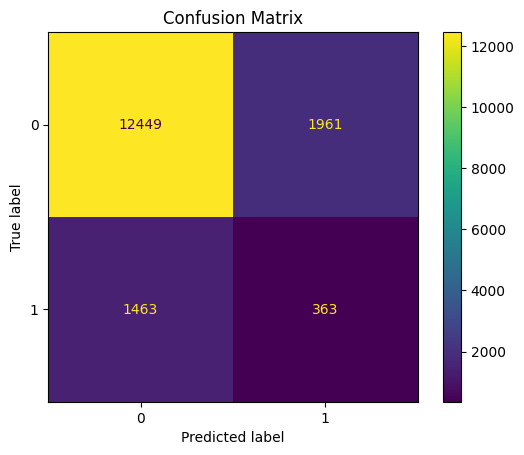

In [277]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtree.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## Pruned decision tree classifier
 Train a new decision tree to avoid overfitting the dataset --> limiting the depth of the tree

In [278]:
# Train the Pruned Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
    class_weight= 'balanced'
)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

Text(0.5, 1.0, 'Confusion Matrix')

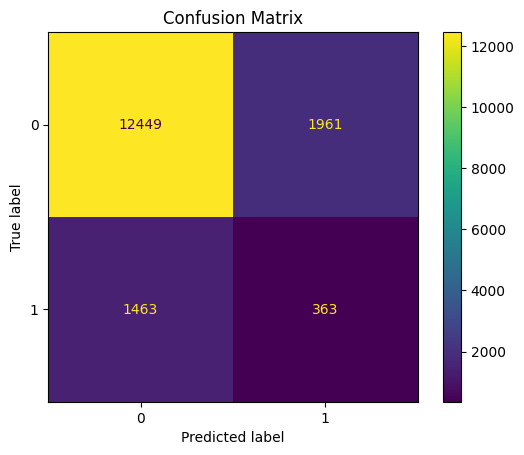

In [279]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_classifier.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'number_inpatient <= 1.5\ngini = 0.5\nsamples = 64940\nvalue = [32470.0, 32470.0]\nclass = 1'),
 Text(0.25, 0.625, 'discharge_disposition_id_1 <= 0.5\ngini = 0.496\nsamples = 55732\nvalue = [28377.417, 23711.585]\nclass = 0'),
 Text(0.125, 0.375, 'discharge_disposition_id_11 <= 0.5\ngini = 0.498\nsamples = 21807\nvalue = [10759.317, 12074.753]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.497\nsamples = 20944\nvalue = [10274.698, 12074.753]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = -0.0\nsamples = 863\nvalue = [484.618, 0.0]\nclass = 0'),
 Text(0.375, 0.375, 'number_inpatient <= 0.5\ngini = 0.479\nsamples = 33925\nvalue = [17618.1, 11636.832]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.464\nsamples = 27091\nvalue = [14203.87, 8197.329]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 6834\nvalue = [3414.23, 3439.503]\nclass = 1'),
 Text(0.75, 0.625, 'number_inpatient <= 4.5\ngini = 0.434\nsamples = 9208\nvalue = [4092.583, 8758.415]\nclass = 1'),
 Text(0.625

Text(0.5, 1.0, 'Decision Tree')

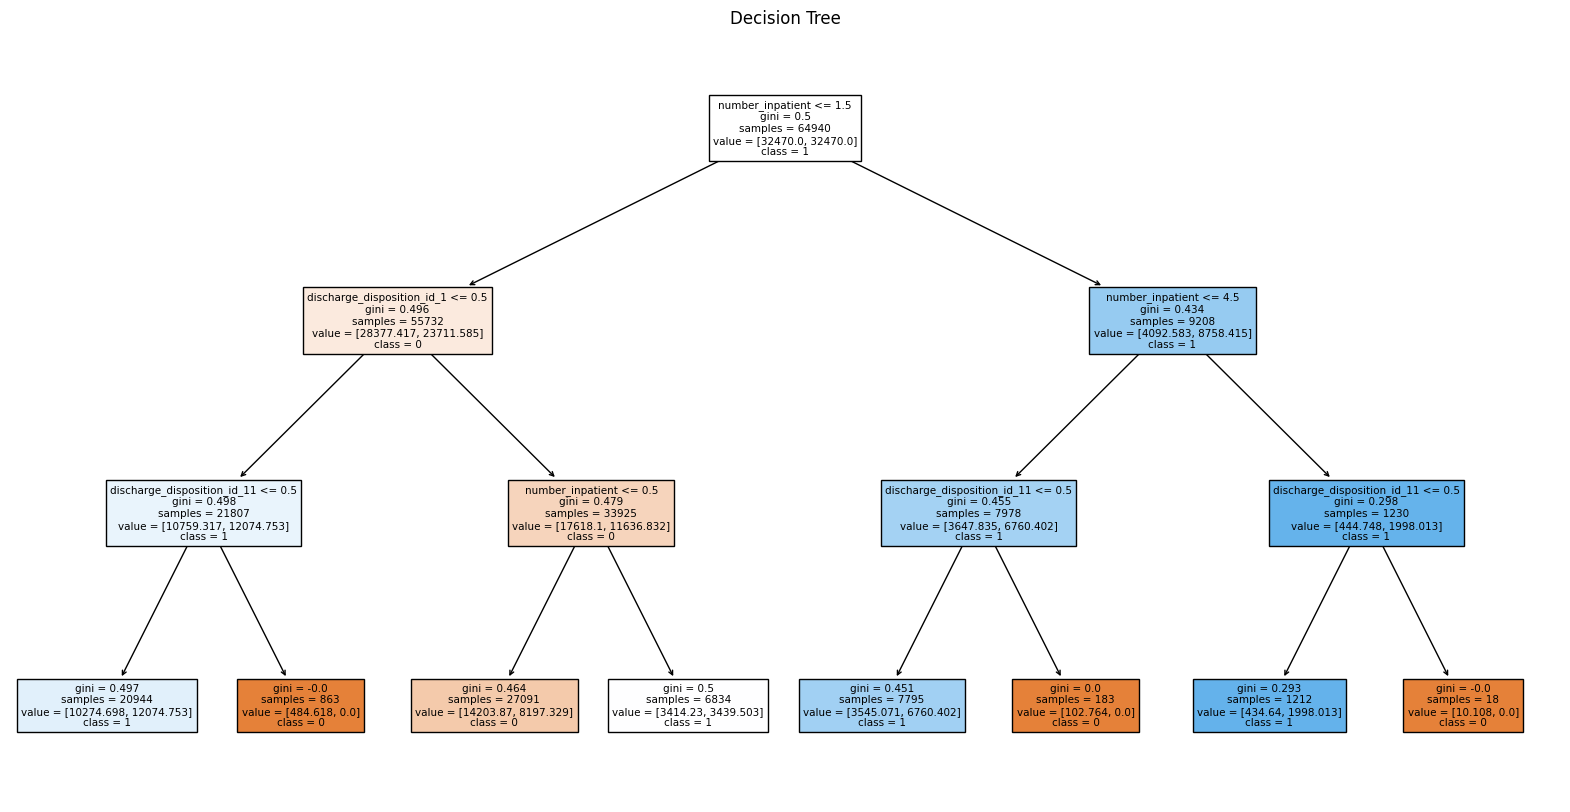

In [280]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_test.columns, class_names=['0', '1'], filled=True)
plt.title('Decision Tree')
plt.show()

##Grid search

In [281]:
param_grid = {
    'class_weight': [None, 'balanced'], # Define different class weight options
    'max_depth': [3, 5, 7, 9], # Define different max depth options
    'min_samples_split': [2, 5, 10,18], # Define different min samples split options
    'min_samples_leaf': [6,8,10,12], # Define different min samples leaf options
    'max_features': ['auto', 'sqrt', 'log2'] # Define different max features options
}

In [282]:
grid = GridSearchCV(DecisionTreeClassifier(), # Initialize GridSearchCV with DecisionTreeClassifier
                    param_grid, # The parameter grid
                    cv=3, # Number of cross-validation folds
                    scoring='f1', # Scoring metric
                    verbose=1#, # Verbosity level to show the messages during training
                    )

In [283]:
grid.fit(X_train, y_train) # Fit the grid search on training data

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [6, 8, 10, 12],
                         'min_samples_split': [2, 5, 10, 18]},
             scoring='f1', verbose=1)

In [284]:
results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score') # Sort and display results based on rank
results.head(5) #  Display the top 5 results
results.shape # Display the shape of the results DataFrame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
360,0.398060,0.015751,0.103178,0.006027,balanced,9,sqrt,10,2,"{'class_weight': 'balanced', 'max_depth': 9, '...",0.244174,0.215187,0.250948,0.236770,0.015510,1
290,0.379146,0.014026,0.094487,0.003699,balanced,7,auto,6,10,"{'class_weight': 'balanced', 'max_depth': 7, '...",0.240401,0.239255,0.206430,0.228695,0.015751,2
354,0.278568,0.005058,0.075616,0.001544,balanced,9,sqrt,6,10,"{'class_weight': 'balanced', 'max_depth': 9, '...",0.216715,0.220351,0.248784,0.228617,0.014338,3
348,0.403968,0.011607,0.100516,0.001057,balanced,9,auto,12,2,"{'class_weight': 'balanced', 'max_depth': 9, '...",0.232306,0.237029,0.215580,0.228305,0.009202,4
209,0.227987,0.008519,0.076072,0.001274,balanced,3,sqrt,6,5,"{'class_weight': 'balanced', 'max_depth': 3, '...",0.236659,0.237953,0.202851,0.225821,0.016251,5


(384, 16)

##Picking the best model

In [285]:
# Retrieve the best model from GridSearchCV
best_model_DT = grid.best_estimator_

In [286]:
# Make predictions on the test set with the best model
y_pred = best_model_DT.predict(X_test)

# Calculate F1 score
f1 = best_model_DT.score(X_test, y_test)

In [287]:
# Display the best model
best_model_DT

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       max_features='sqrt', min_samples_leaf=10)

In [288]:
# Make predictions on the test set again with the best model
y_pred=best_model_DT.predict(X_test)


To evaluate the Decision Tree model, several performance metrics were considered. The model achieved an accuracy of 0.58 on the test set, meaning it correctly predicted 58% of the instances. This accuracy indicates moderate performance but suggests there is room for improvement.

In [289]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.58


In [290]:
# Calculate and print recall
recall_score = recall_score(y_test, y_pred)
print(f'Recall: {recall_score:.2f}')

Recall: 0.49


In [291]:
# Calculate and print precision
precision_score = precision_score(y_test, y_pred)
print(f'Precision: {precision_score:.2f}')

Precision: 0.13


In [292]:
from sklearn.metrics import f1_score
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.21


The precision of 0.13 indicates that only 13% of the positive predictions (readmitted) were correct. This low precision suggests that the model frequently misclassifies non-readmitted cases as readmitted. The recall of 0.49 means the model correctly identified 49% of the actual readmitted cases, showing it misses over half of the true readmissions. The F1 score, which balances precision and recall, was 0.21, highlighting the model's overall struggle with accurate predictions.

Text(0.5, 1.0, 'Confusion Matrix of best model')

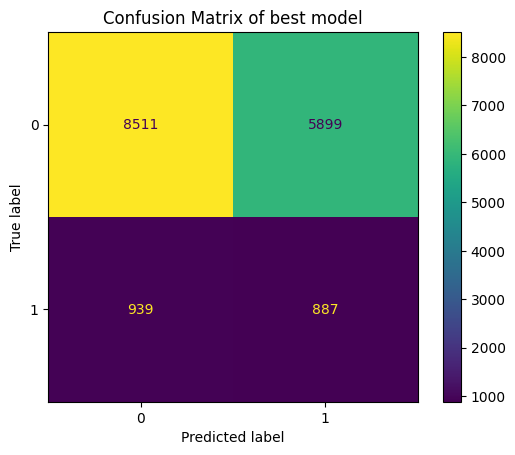

In [293]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_DT.classes_)
disp.plot()
plt.title('Confusion Matrix of best model')
plt.show()

The confusion matrix provided a deeper insight into the model's performance:

*   True Positives (TP): 887
*   True Negatives (TN): 8511
*   False Positives (FP): 5899
*   False Negatives (FN): 939
  
These values show that while the model correctly identified 887 readmitted cases, it also incorrectly predicted 5899 non-readmitted cases as readmitted. Additionally, it correctly identified 8511 non-readmitted cases but missed 939 actual readmitted cases.

##Feature importance

In [294]:
# Retrieve feature importances
feature_importances = best_model_DT.feature_importances_

In [295]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

In [296]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.iloc[0:15]

,Feature,Importance
6,number_inpatient,0.167843
45,discharge_disposition_id_11,0.145726
847,insulin_taken_Yes,0.111782
7,number_diagnoses,0.109346
54,discharge_disposition_id_22,0.058413
155,diag_1_109.0,0.030669
10,race_Caucasian,0.030572
2,num_procedures,0.029226
92,medical_specialty_Hematology/Oncology,0.026422
114,medical_specialty_Pediatrics-Endocrinology,0.021720


<Figure size 800x600 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importances in Decision Tree Model of best model')

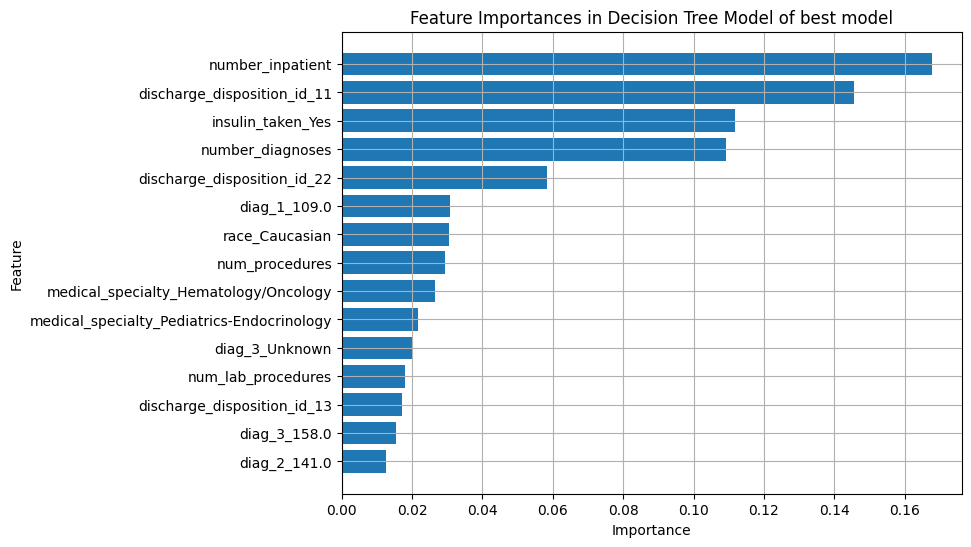

In [297]:
# Plot feature importances again
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].iloc[0:15], feature_importance_df['Importance'].iloc[0:15])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model of best model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(True)
plt.show()

##Visualize the Decision Tree of the best model

<Figure size 2000x1000 with 0 Axes>

[Text(0.6594893292682927, 0.95, 'diag_1_109.0 <= 0.5\ngini = 0.5\nsamples = 64940\nvalue = [32470.0, 32470.0]\nclass = 1'),
 Text(0.3799542682926829, 0.85, 'insulin_taken_Yes <= 0.5\ngini = 0.5\nsamples = 63304\nvalue = [31686.636, 31370.636]\nclass = 0'),
 Text(0.20121951219512196, 0.75, 'diag_1_232.0 <= 0.5\ngini = 0.498\nsamples = 29524\nvalue = [14970.387, 13069.198]\nclass = 0'),
 Text(0.18902439024390244, 0.65, 'number_diagnoses <= 5.5\ngini = 0.498\nsamples = 29490\nvalue = [14951.294, 13069.198]\nclass = 0'),
 Text(0.12804878048780488, 0.55, 'diag_1_205.0 <= 0.5\ngini = 0.473\nsamples = 6667\nvalue = [3477.685, 2162.234]\nclass = 0'),
 Text(0.10365853658536585, 0.45, 'medical_specialty_Hematology/Oncology <= 0.5\ngini = 0.475\nsamples = 6410\nvalue = [3339.544, 2112.055]\nclass = 0'),
 Text(0.09146341463414634, 0.35, 'other_meds_change_Yes <= 0.5\ngini = 0.473\nsamples = 6392\nvalue = [3334.49, 2071.0]\nclass = 0'),
 Text(0.04878048780487805, 0.25, 'age_[80-90) <= 0.5\ngini = 0

Text(0.5, 1.0, 'Decision Tree')

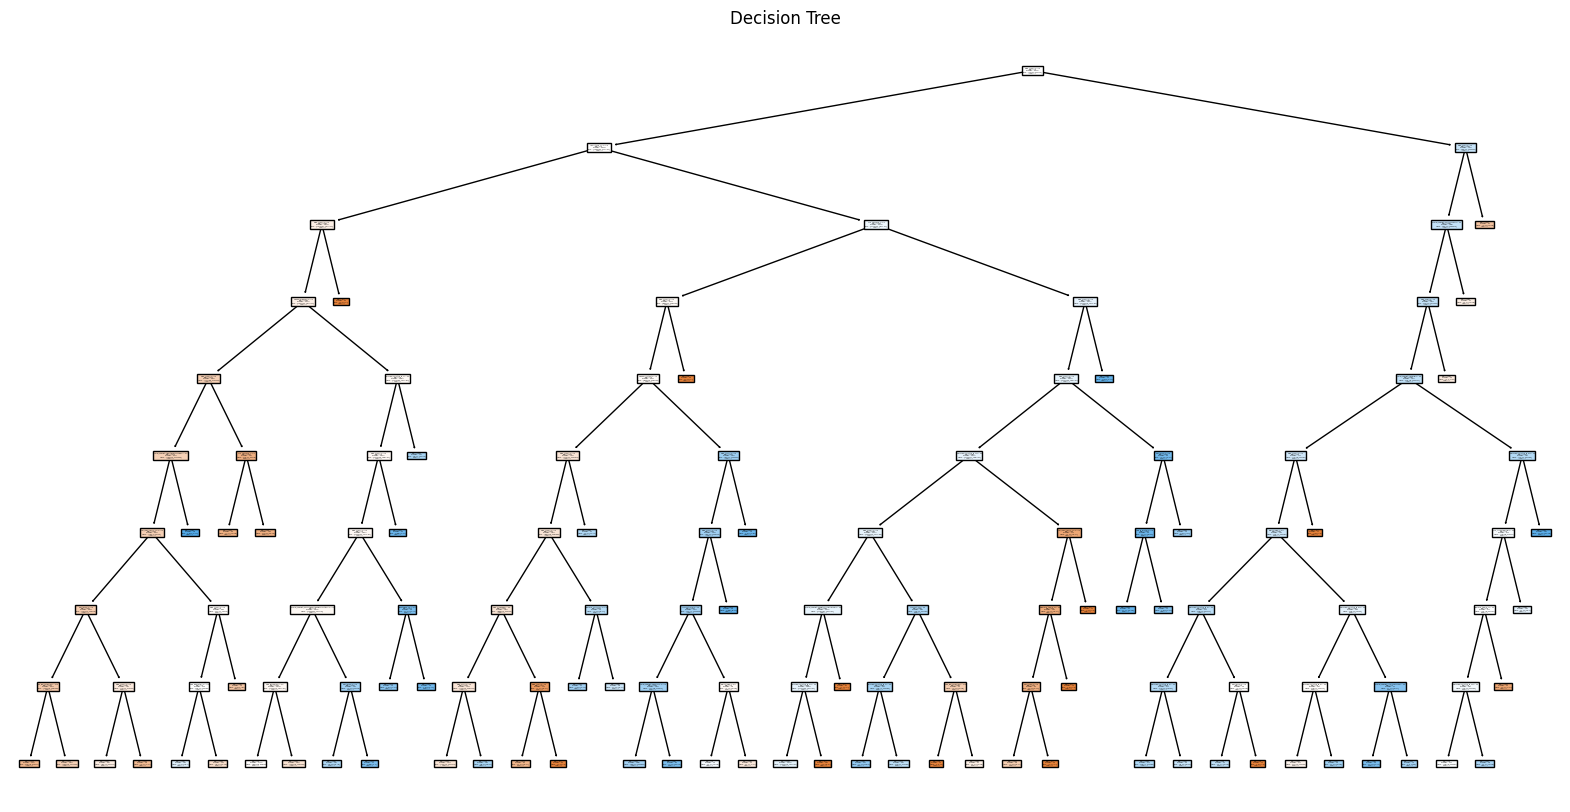

In [298]:
plt.figure(figsize=(20, 10))
plot_tree(best_model_DT, feature_names=X_test.columns, class_names=['0', '1'], filled=True)
plt.title('Decision Tree')
plt.show()

##SHAP values

In [299]:
# Initialize SHAP for Tree based models
explainer_dt  = shap.TreeExplainer(best_model_DT)

In [300]:
# Compute SHAP values for X_test given the Decision Tree model trained
shap_values_dt = explainer_dt(X_test).values[:, :, 1]

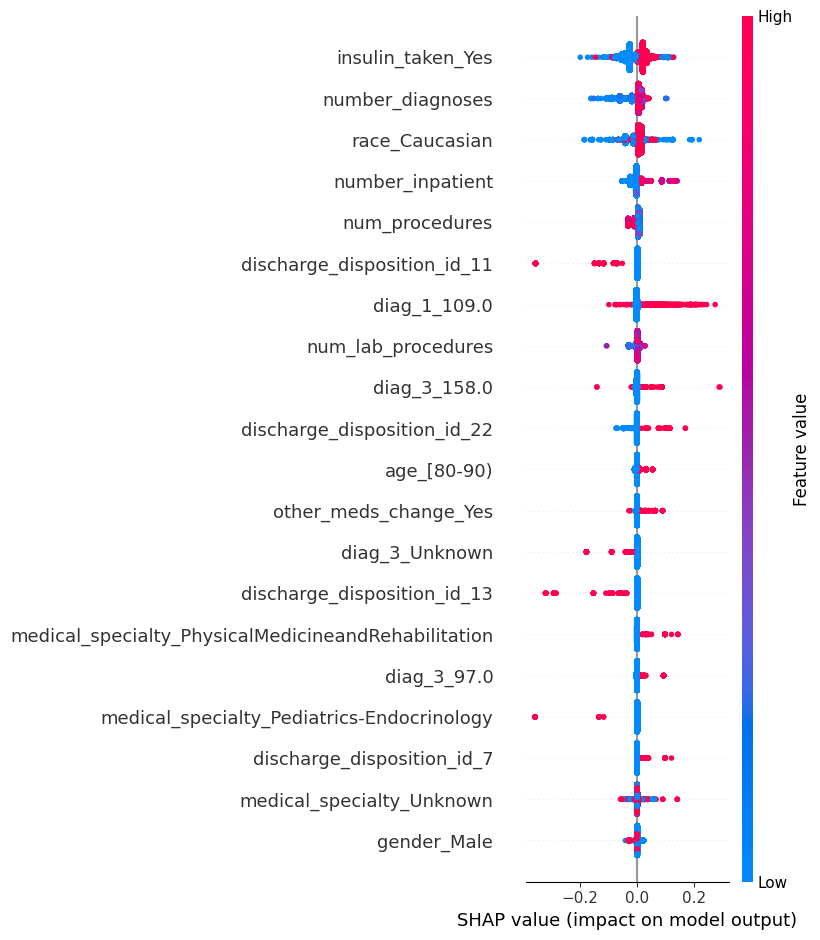

In [301]:
# Plot summary plot
shap.summary_plot(shap_values_dt, X_test)

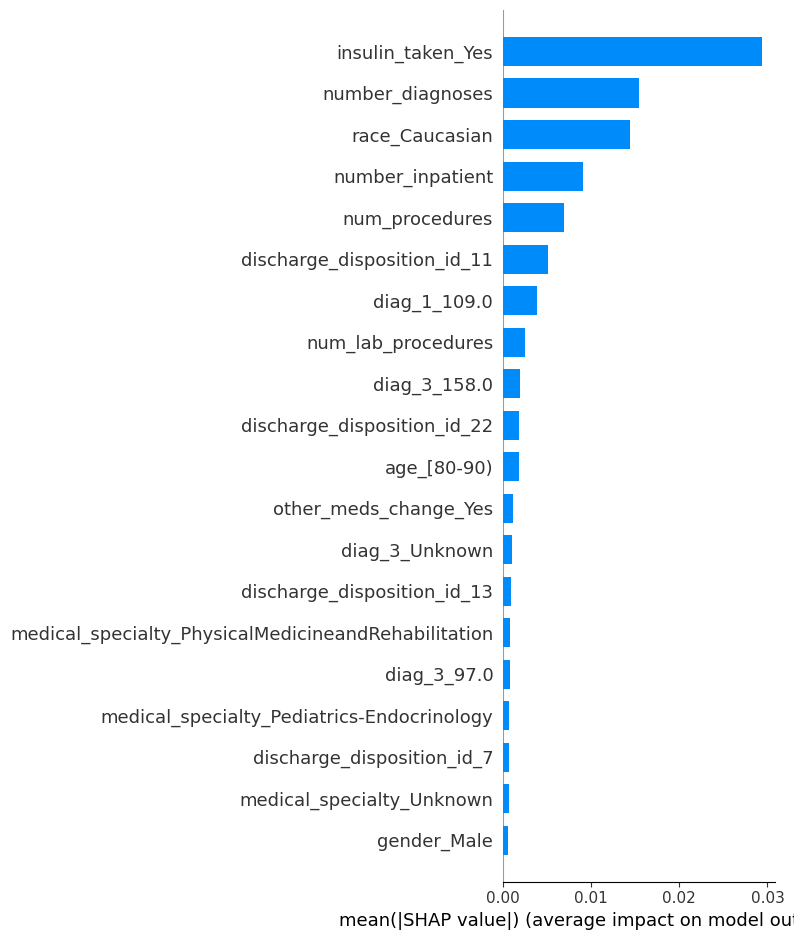

In [302]:
# Plot bar summary_plot
shap.summary_plot(shap_values_dt, X_test, plot_type="bar")

#3.4 - Random forest

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [304]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42, class_weight= 'balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [305]:
# Make predictions on the train set - accuracy
y_predicted_train = rf_classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_predicted_train)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.64


In [306]:
# Make predictions on the test set - accuracy
y_predicted = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [307]:
# Make predictions on the train set - recall????
y_predicted = rf_classifier.predict(X_test)
recall = recall_score(y_test, y_predicted)
print(f'Recall: {recall_value:.2f}')

TypeError: 'numpy.float64' object is not callable

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# Make predictions on the train set - precision????
y_predicted_train = rf_classifier.predict(X_train)

precision = precision_score(y_train, y_predicted_train)
print(f'Precision: {precision:.2f}')

#precision_score = lambda y_test, y_predict: sum((y_test == 1) & (y_predict == 1)) / sum(y_test == 1)
#precision_score(y_test, y_predict)

In [ ]:
# Make predictions on the train set - f1_score????
y_predicted_train = rf_classifier.predict(X_train)

f1 = f1_score(y_train, y_predicted_train)
print(f'F1 Score: {f1:.2f}')
#f1_score = lambda y_test, y_predict: 2 * precision_score(y_test, y_predict) * recall_score(y_test, y_predict) / (precision_score(y_test, y_predict) + recall_score(y_test, y_predict))
#f1_score(y_test, y_predict)

In [ ]:
# Make predictions on the test set
y_predicted = rf_classifier.predict(X_test)

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

##Treshold analysis

In [ ]:
probas = rf_classifier.predict_proba(X_test)[:,1]
probas[:5] #

In [ ]:
ths = np.arange(0.1,1,step=0.1)
ths

In [ ]:
results = []
for decision_threshold in ths:
    th_preds = (probas > decision_threshold).astype(int)

    recall = recall_score(y_test, th_preds)
    precision = precision_score(y_test, th_preds)

    results.append({"decision_threshold":decision_threshold,"recall":recall,"precision":precision})

results = pd.DataFrame(results).set_index('decision_threshold')
results

##roc curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probas)

# plot the curve
plt.figure(figsize=(6,4));
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve');
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--'); # random model
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve');
plt.legend(loc="lower right");
plt.show();

In [ ]:
roc_auc_score(y_test, probas)

## random search

In [ ]:
param_random = {
    'n_estimators': [100, 200, 300],
    'class_weight': [None, 'balanced'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
random = RandomizedSearchCV(RandomForestClassifier(), # your model
                    n_iter=30, # number of iterations
                    param_distributions=param_random, #the parameter grid
                    cv=3, #how many folds do you want in your cross-validation
                    scoring='f1', # what scoring metric do you want. More here: https://scikit-learn.org/stable/modules/model_evaluation.html
                    verbose=2,#, # to show the messages during training,
                    )

In [ ]:
random.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
results.head(5)
results.shape

In [ ]:
#confusion matrix do best model

In [ ]:
#do predictions predictions no best model

##Feature importance

In [308]:
# Retrieve feature importances
feature_importances = rf_classifier.feature_importances_

In [309]:
# Create a DataFrame for visualization
#importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
#importance_rf = importance_df.sort_values(by='Importance', ascending=False)

# Create a DataFrame for better visualization
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

In [310]:
# Sort the DataFrame by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
feature_importance_rf.iloc[0:15]

,Feature,Importance
6,number_inpatient,0.147774
35,discharge_disposition_id_1,0.075270
54,discharge_disposition_id_22,0.051314
37,discharge_disposition_id_3,0.050277
5,number_emergency,0.046056
45,discharge_disposition_id_11,0.044848
7,number_diagnoses,0.040258
0,time_in_hospital,0.033025
848,insulin_change_No,0.030244
846,insulin_taken_No,0.028092


<Figure size 800x600 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importances in Decision Tree Model')

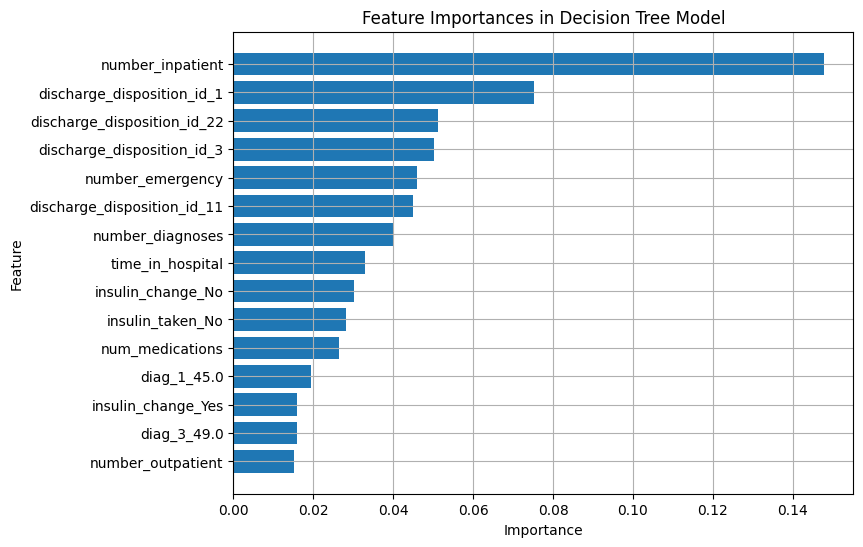

In [311]:
# Plot feature importances again
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_rf['Feature'].iloc[0:15], feature_importance_rf['Importance'].iloc[0:15])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(True)
plt.show()

##SHAP values

In [312]:
# Initialize SHAP for Tree based models
explainer_rf  = shap.TreeExplainer(RF_model)

NameError: name 'RF_model' is not defined

In [313]:
# Compute SHAP values for X_test given the Decision Tree model trained
shap_values_rf = explainer_rf(X_test).values[:, :, 1]

NameError: name 'explainer_rf' is not defined

In [314]:
# Plot summary_plot
shap.summary_plot(shap_values_rf, X_test)

NameError: name 'shap_values_rf' is not defined

In [315]:
# Plot bar summary_plot
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

NameError: name 'shap_values_rf' is not defined